In [26]:
import numpy as np
import pandas as pd
# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ('#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf')
sns.set(style='ticks', palette=colors)

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}


In [27]:
def tradeoff_func(kvec, koff_r2w):
    kon, koff, kp, kcat = kvec
    koffw = koff * koff_r2w
  
    # Existing terms
    activity = kon * kp / ((koff + kon) * (koff + kp) + kcat * (koff + kon + kp))
    activity_flux = activity * kcat
    fidelity = ((koffw + kon) * (koffw + kp) + kcat * (koffw + kon + kp)) / ((koff + kon) * (koff + kp) + kcat * (koff + kon + kp))
    fidelity_normalized = fidelity / koff_r2w**2
    
    # Define activity_ER_EW (temp in the figure)
    term1 = 1
    term2 = (kcat + koffw) / kp
    term3 = ((kcat + koffw) * (koffw + kp)) / (kon * kp)
    term4 = ((kcat + koffw) * (koffw + kp)) / (kp * (koff + kp))
    term5 = ((kcat + koffw) * (koffw + kp)) / ((kcat + koff) * (koff + kp))
    sum_ER_EW = term1 + term2 + term3 + term4 + term5
    
    # Define fidelity_ER_EW (eta in the figure)
    numerator = (kcat + koffw) * (koffw + kp)
    denominator = (kcat + koff) * (koff + kp) * sum_ER_EW
    activity_ER_EW = numerator / denominator
    fidelity_ER_EW = (kcat + koffw) * (koffw + kp) /((kcat + koff) * (koff + kp))

    # Define D_R and D_W
    D_R = (koff + kp) * (koff + kcat)
    D_W = (koffw + kp) * (koffw + kcat)

    # Compute activity (c_1')
    denominator_activity = D_R + kon * (koff + kp + kcat) + (D_R / D_W) * kon * (koffw + kp + kcat)
    activity_competition = (kon * kp) / denominator_activity

    # Compute fidelity (eta_1)
    numerator_fidelity = D_W + kon * (koffw + kp + kcat) + (D_W / D_R) * kon * (koff + kp + kcat)
    denominator_fidelity = D_R + kon * (koff + kp + kcat) + (D_R / D_W) * kon * (koffw + kp + kcat)
    fidelity_competition = numerator_fidelity / denominator_fidelity


    return [activity, fidelity, activity_flux, fidelity_normalized, activity_ER_EW, fidelity_ER_EW, activity_competition,fidelity_competition]

# def lam_func(kvec,koff_r2w):
#   kon,koff,kp,kcat=kvec
#   activity,fidelity=tradeoff_func(kvec,koff_r2w)
#   lam=( (koff*koff_r2w+kp+kon)/(koff+kp+kon) - fidelity) / activity
#   return lam


n_pts=10000
min_log10=-6
max_log10=6
n_dim=4# kon, koff, kp, kcat
koff_r2w=1e3 # koffw = koff * koff_r2w

kk=10**(np.random.rand(n_pts,n_dim)*(max_log10 - min_log10)+min_log10)

# make kon = kp
#kk[:,0]=kk[:,2]

result=np.zeros((n_pts,8))

# lam=np.zeros(n_pts)

for i in range(n_pts):
  kvec=kk[i,:]
  result[i]=tradeoff_func(kvec,koff_r2w)
  # lam[i] = lam_func(kvec,koff_r2w)


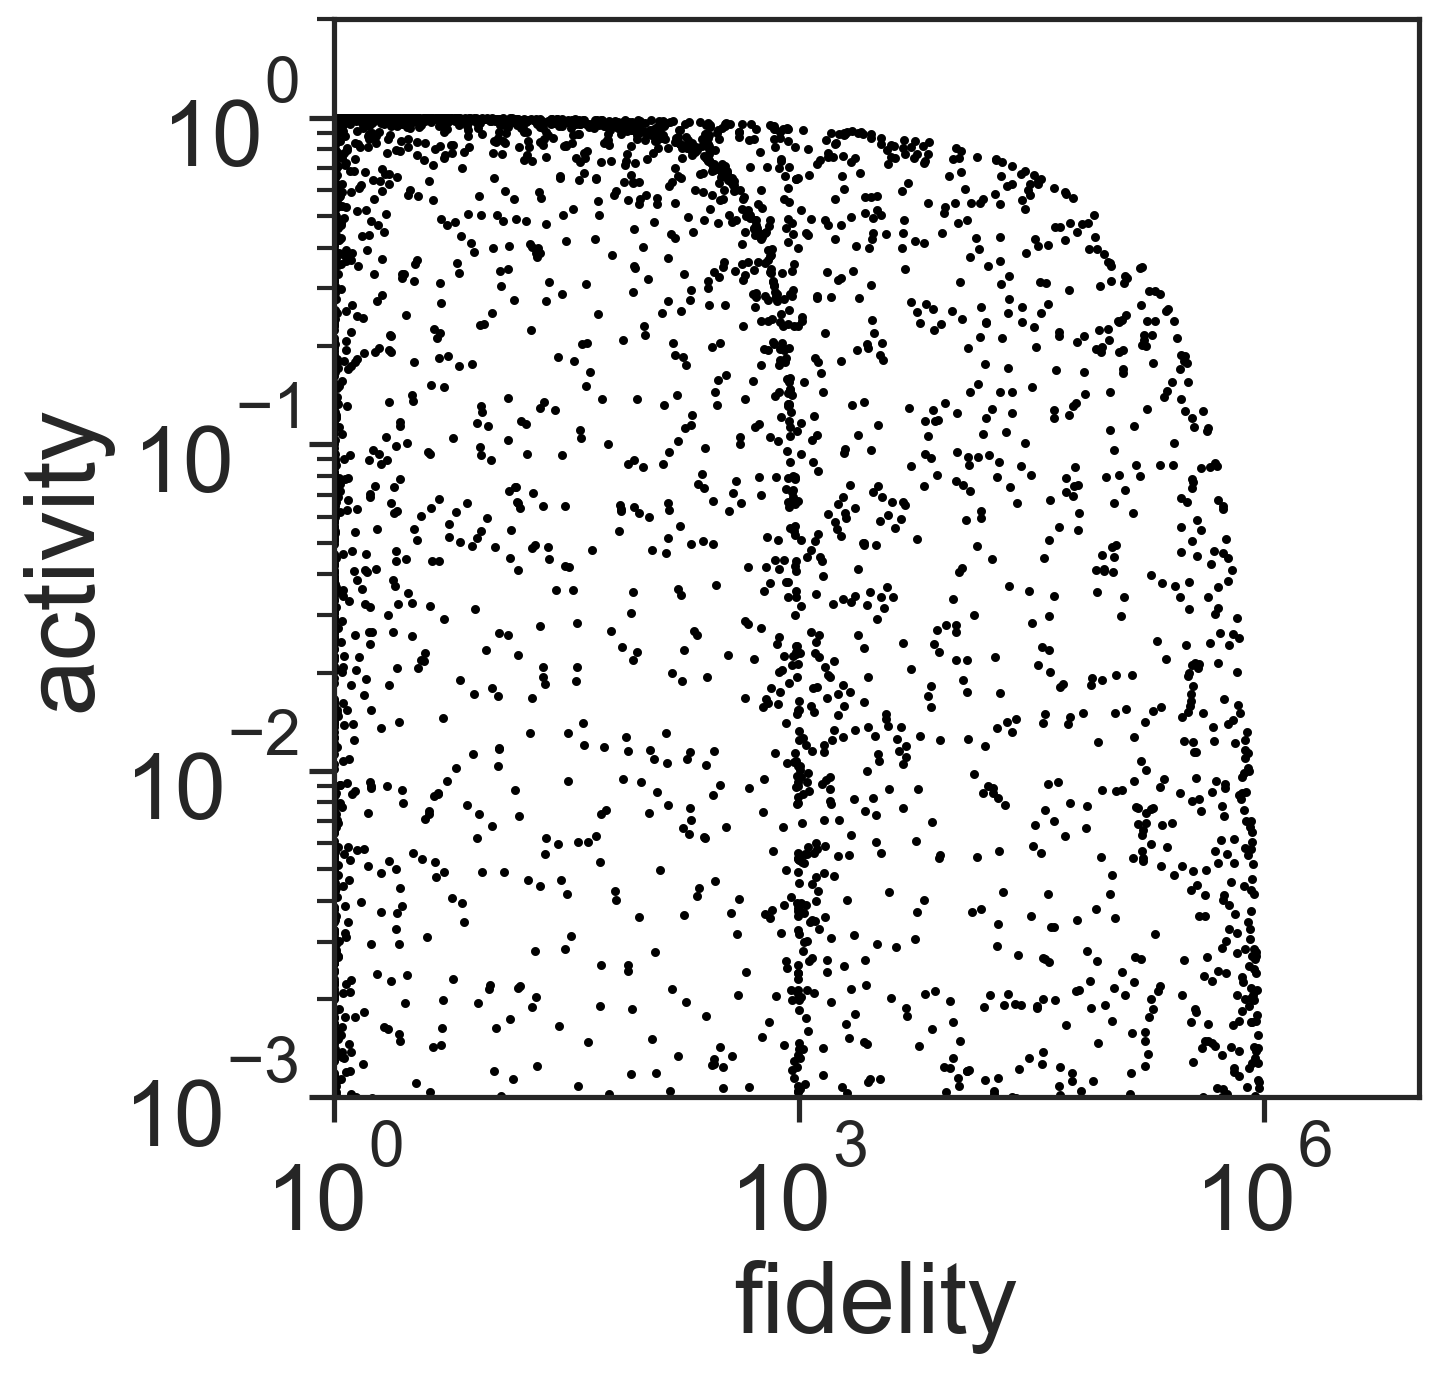

In [28]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(result[:,1],result[:,0],s=3,color='k')
# ax.scatter(result[mask,0],result[mask,1],s=1,color='b')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')

#remove top and right borders
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
#restrict number of ticks
# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)


ax.set_ylim([1e-3,1*2])
ax.set_xlim([1,1e7])
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()

# Save and show the figure
plt.savefig(f'figure_5b2.svg', bbox_inches='tight', transparent=True)
plt.show()
## Below are commands that saves and then downloads the figure from google colab
# plt.savefig('C-log-der-tE-tS-sampling-transparent.png', dpi=300,bbox_inches='tight',transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')

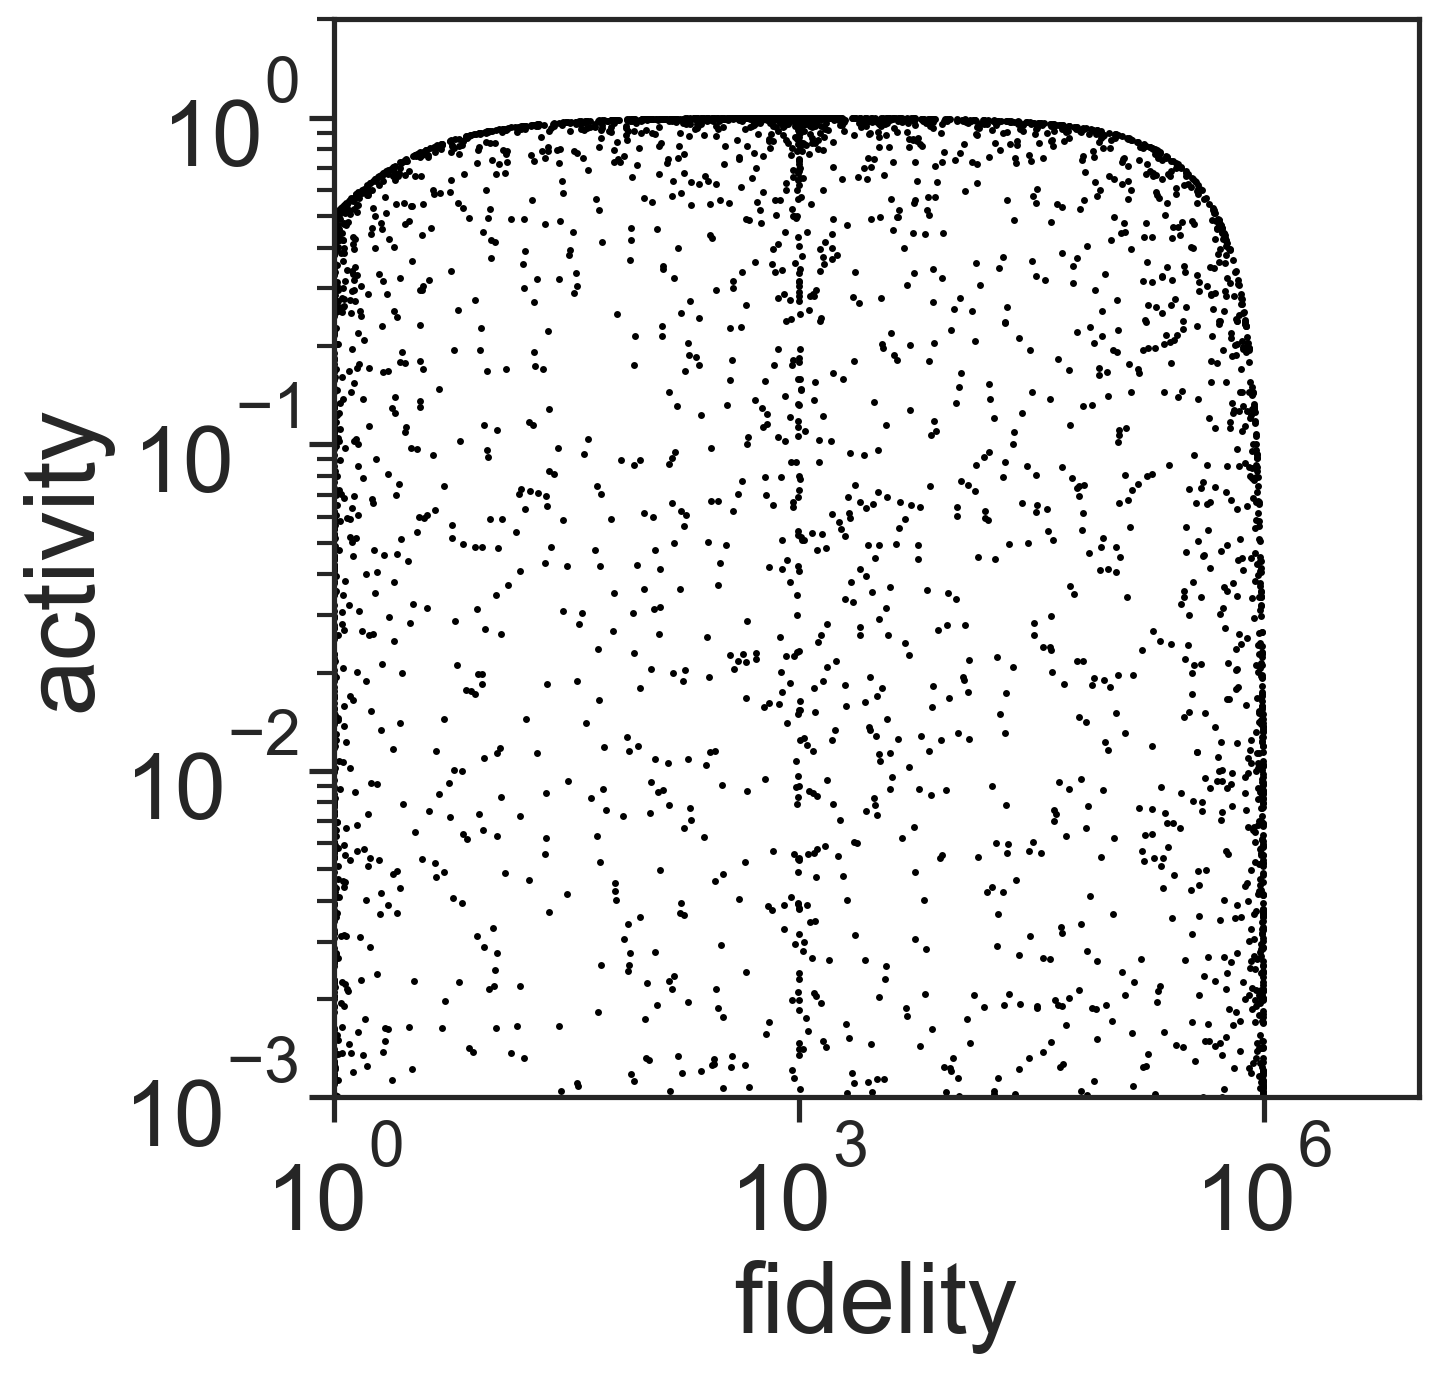

In [29]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(result[:,5],result[:,4],s=1,color='k')
# ax.scatter(result[mask,0],result[mask,1],s=1,color='b')
#ax.set_title(r'EREW')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')

#remove top and right borders
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
#restrict number of ticks
# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)


ax.set_ylim([1e-3,2])
ax.set_xlim([1,1e7])
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
plt.savefig('figsS5a.svg', bbox_inches='tight', transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')

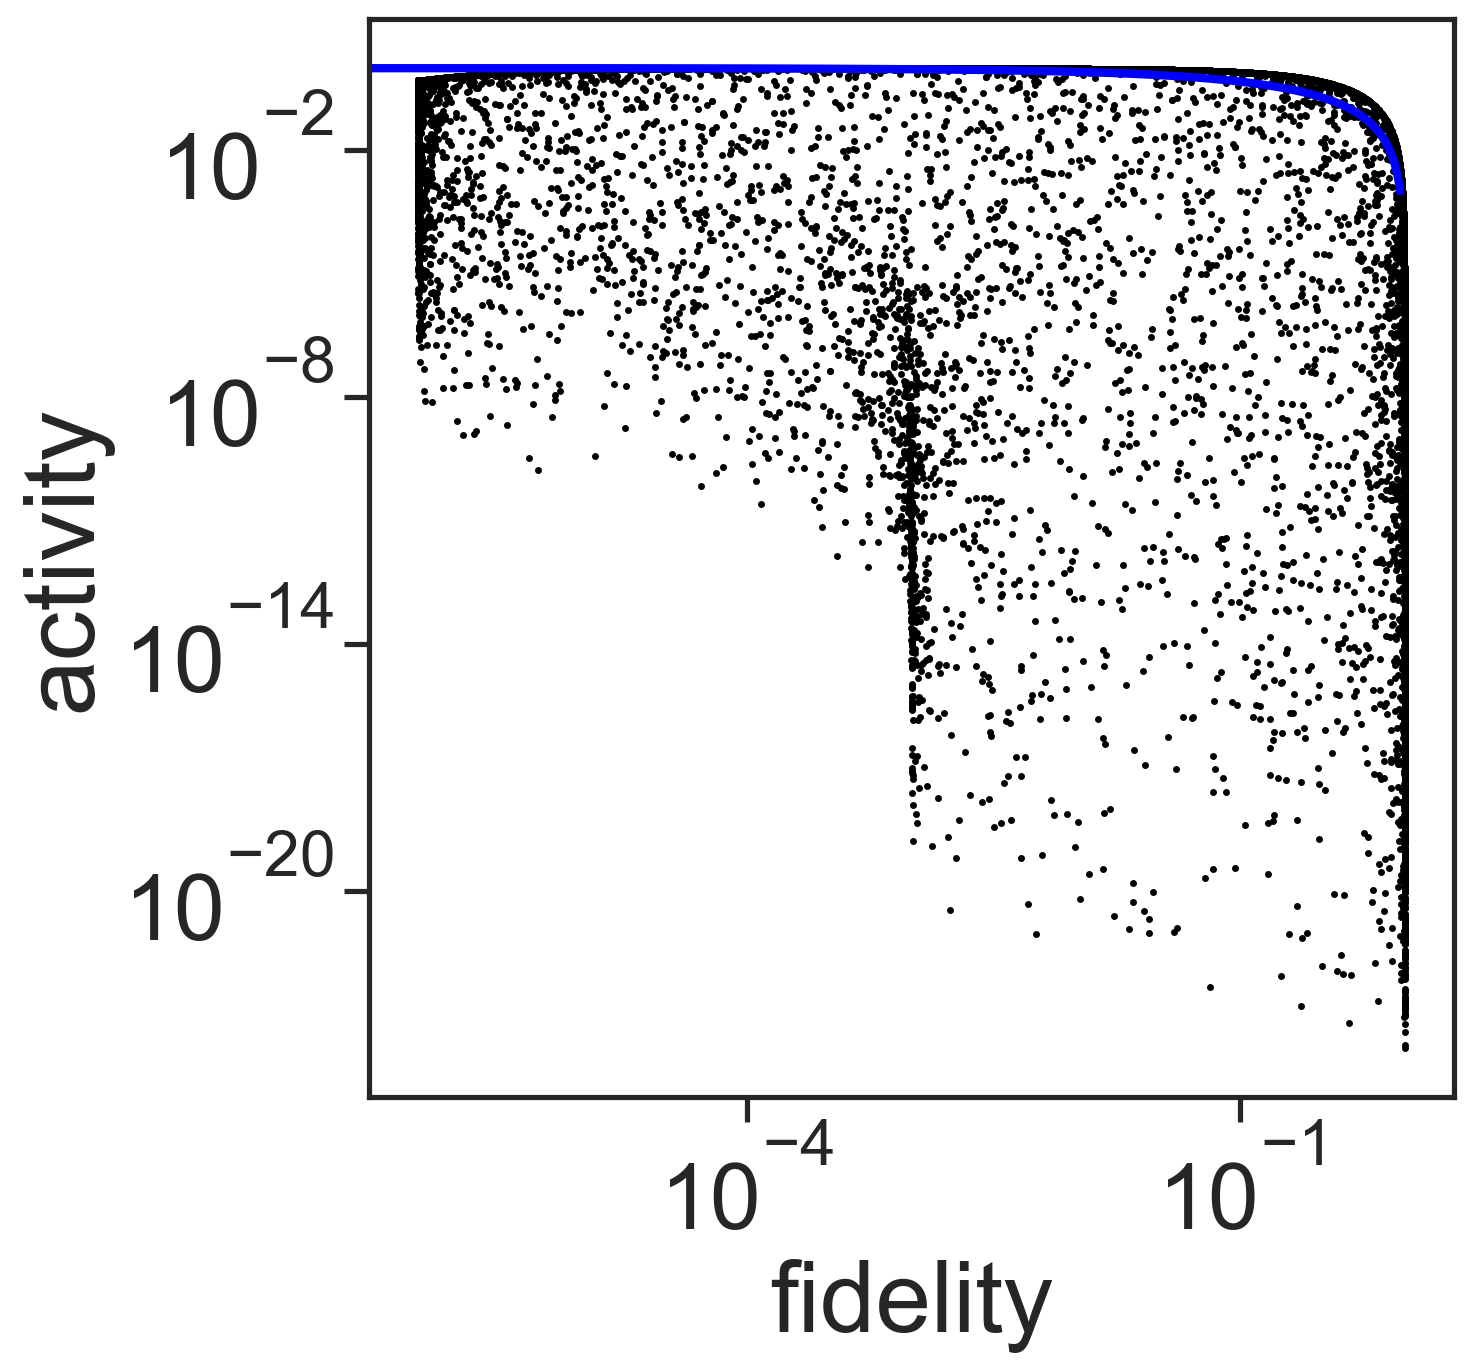

In [42]:
#competition

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(result[:,7]/1000000,result[:,6],s=1,color='k')

xx=np.logspace(-3,0,1000)
ax.plot((1/xx**0.5-1)**2*xx,xx,lw=3,color='b',label=r'$\eta=c(\frac{1}{\sqrt{c}}-1)^2$')
# ax.scatter(result[mask,0],result[mask,1],s=1,color='b')
#ax.set_title(r'EREW')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')

#remove top and right borders
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
#restrict number of ticks
# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)


#ax.set_ylim([1e-3,2])
#ax.set_xlim([1,1e7])
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
#plt.savefig('figsS5.svg', bbox_inches='tight', transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')

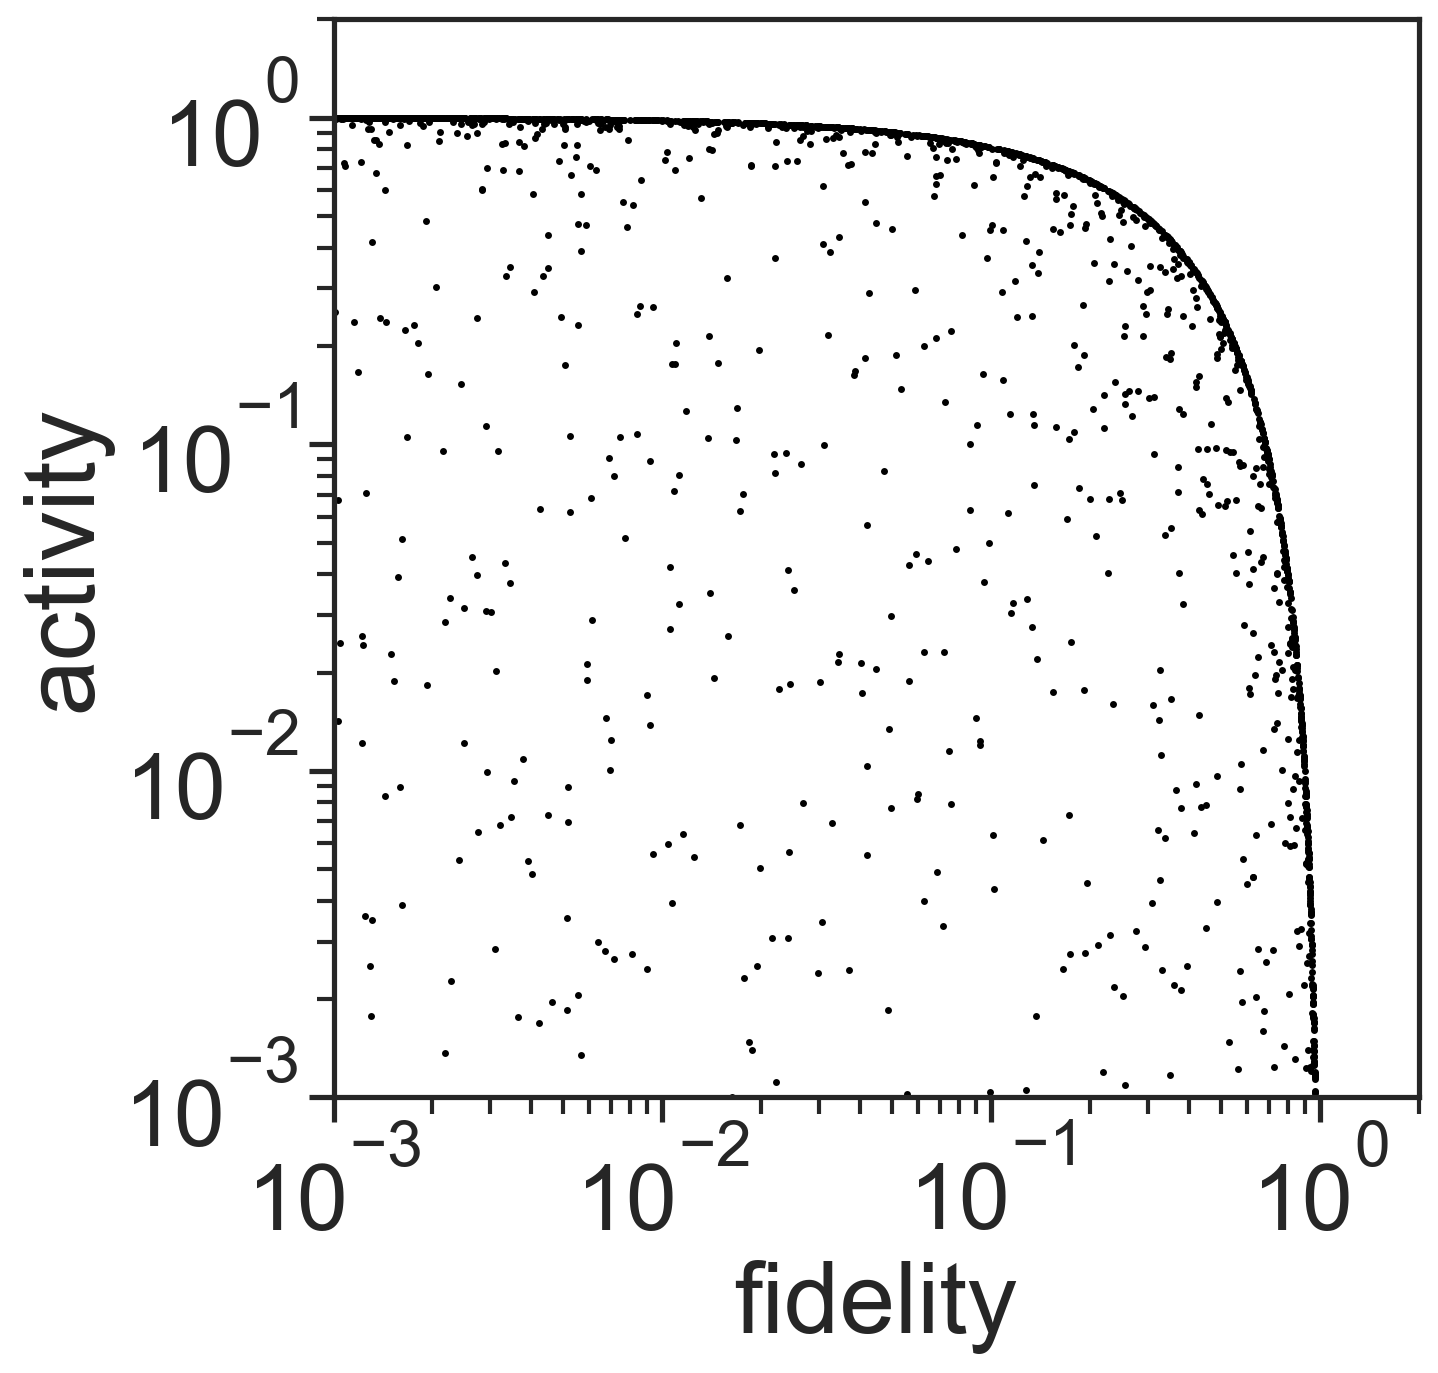

In [45]:
#competition

sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(result[:,7]/1000000,result[:,6],s=1,color='k')

xx=np.logspace(-3,0,1000)
#ax.plot((1/xx**0.5-1)**2*xx,xx,lw=3,color='b',label=r'$\eta=c(\frac{1}{\sqrt{c}}-1)^2$')
# ax.scatter(result[mask,0],result[mask,1],s=1,color='b')
#ax.set_title(r'EREW')
ax.set_ylabel(r'activity')
ax.set_xlabel(r'fidelity')

#remove top and right borders
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
#restrict number of ticks
# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)


ax.set_xlim([1e-3,1*2])
ax.set_ylim([1e-3,1*2])
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()

## Below are commands that saves and then downloads the figure from google colab
#plt.savefig('figsS5.svg', bbox_inches='tight', transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')

Below we extract the points on the pareto optimal front

In [31]:
# make kon = kp
kk[:,0]=kk[:,2]

result=np.zeros((n_pts,8))

# lam=np.zeros(n_pts)

for i in range(n_pts):
  kvec=kk[i,:]
  result[i]=tradeoff_func(kvec,koff_r2w)
  # lam[i] = lam_func(kvec,koff_r2w)

<>:7: SyntaxWarning: invalid escape sequence '\e'
<>:7: SyntaxWarning: invalid escape sequence '\e'
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_10691/1776885090.py:7: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(xx,1-xx,lw=3,color='r',label='$\eta+c=1$')


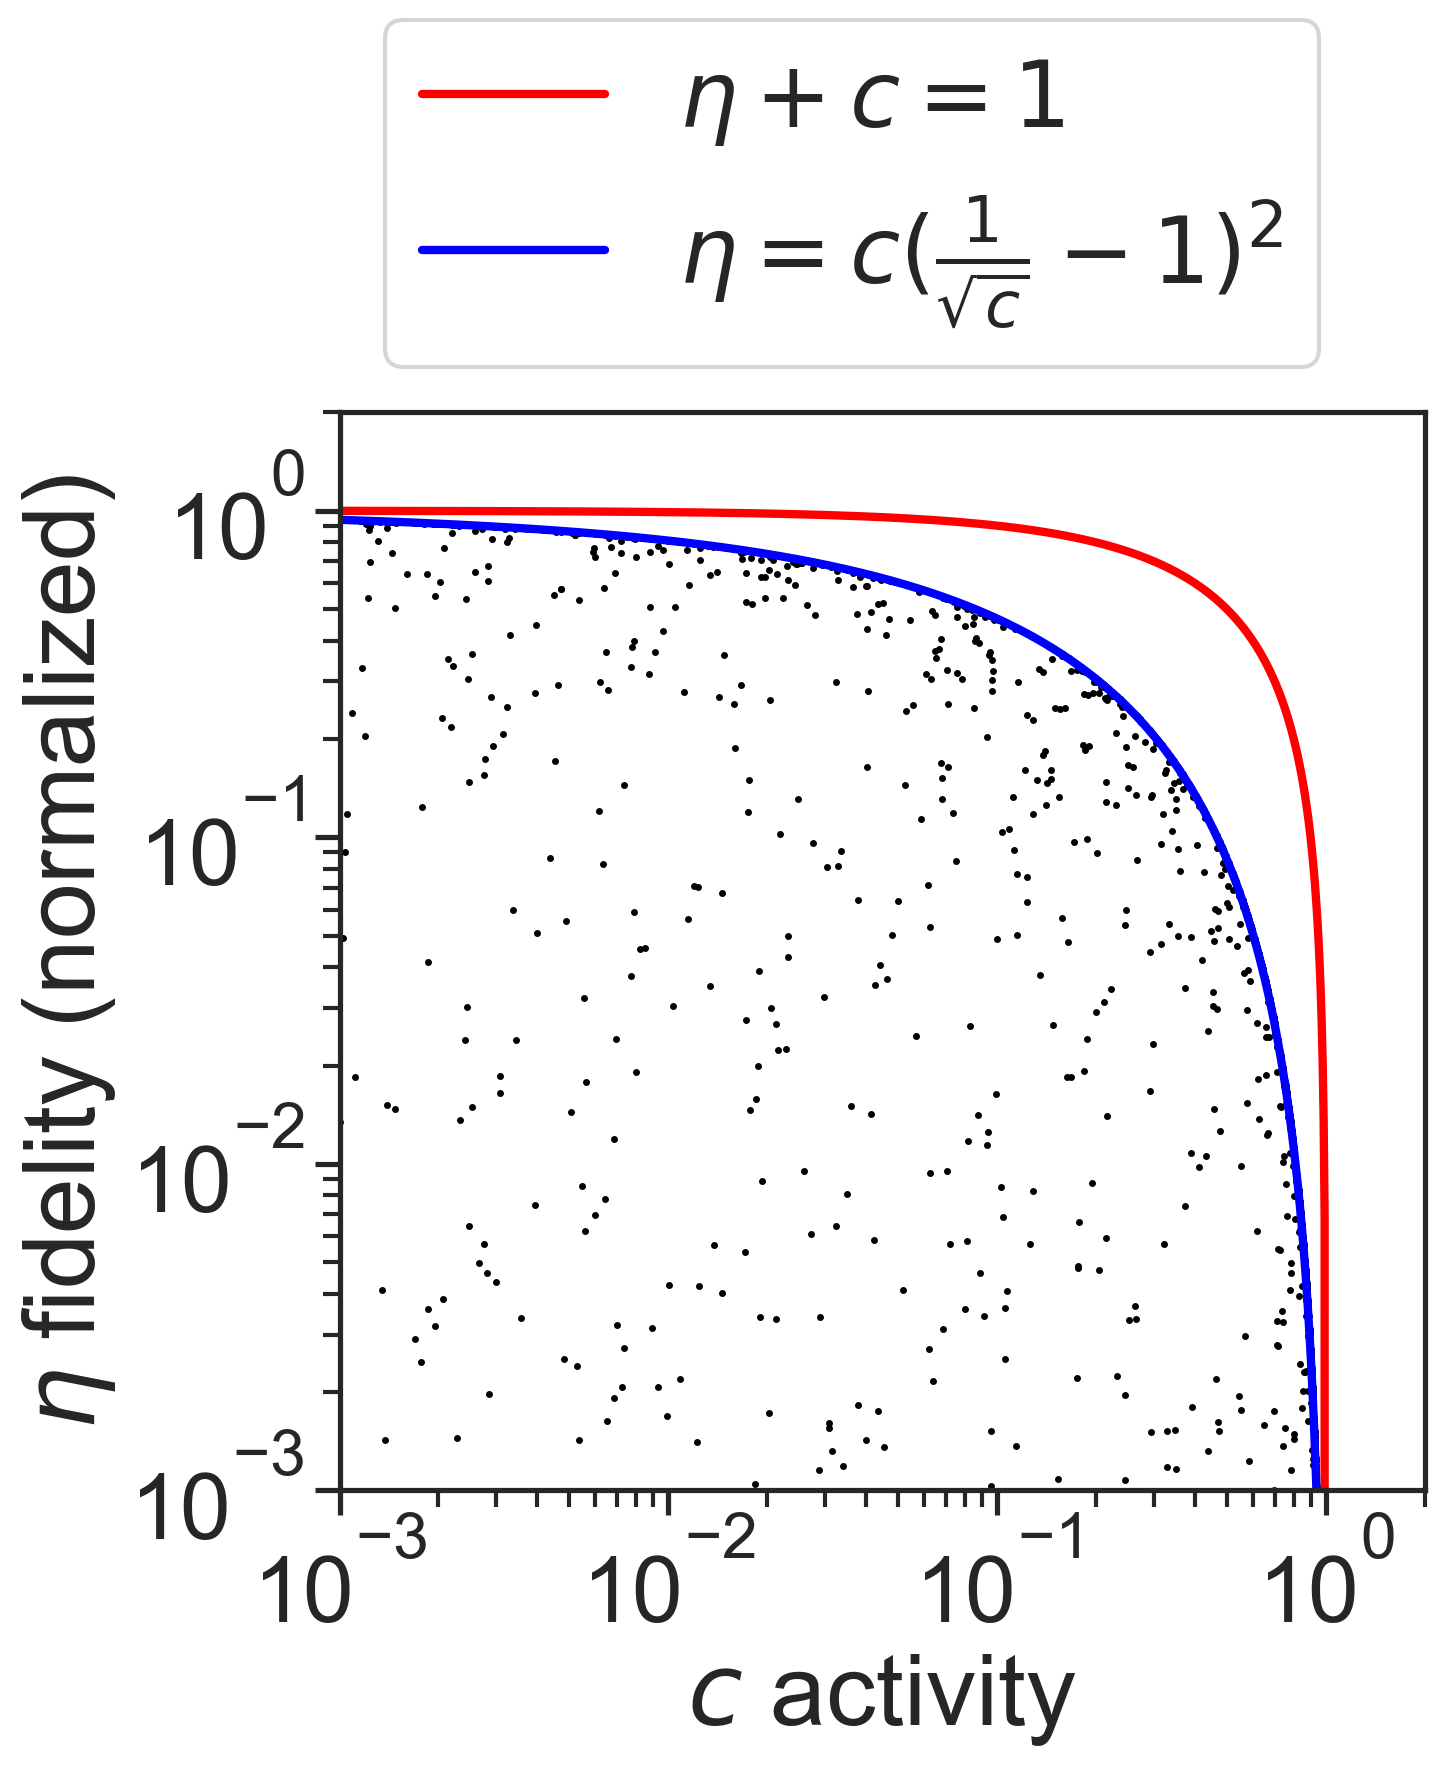

In [32]:
sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

fig, ax = plt.subplots(1, 1,figsize=(7,7))
ax.scatter(result[:,0],result[:,1]/koff_r2w**2,s=1,color='k')

xx=np.logspace(-3,0,1000)
ax.plot(xx,1-xx,lw=3,color='r',label='$\eta+c=1$')
ax.plot(xx,(1/xx**0.5-1)**2*xx,lw=3,color='b',label=r'$\eta=c(\frac{1}{\sqrt{c}}-1)^2$')
# ax.scatter(result[mask,0],result[mask,1],s=1,color='b')
ax.set_xlabel(r'$c$ activity')
ax.set_ylabel(r'$\eta$ fidelity (normalized)')

#remove top and right borders
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
#restrict number of ticks
# plt.locator_params(axis='x', nbins=4)
# plt.locator_params(axis='y', nbins=4)


ax.set_xlim([1e-3,1*2])
ax.set_ylim([1e-3,1*2])
ax.set_xscale('log')
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(0, 1),loc='lower left')

## Below are commands that saves and then downloads the figure from google colab
# plt.savefig('C-log-der-tE-tS-sampling-transparent.png', dpi=300,bbox_inches='tight',transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')

#### for n > 1

In [33]:
# to get the expression of eta and c for any n

import sympy as sp

def reaction_expression(n):
    k_off, k_on, k_p = sp.symbols('koff kon kp')
    part1 = (k_off + k_p)**n
    
    # Part 2: k_on multiplied by the sum of terms
    sum_terms = 0
    for i in range(n):
        coefficient = sp.binomial(n-1, i) * (i + 1)
        term = coefficient * k_off**(n-1 - i) * k_p**i
        sum_terms += term
    
    part2 = k_on * sum_terms
    
    return part1 + part2

# Example usage for n=1, 2, 3
for n in [1, 2, 3, 4]:
    expr = reaction_expression(n)
    print(f"n={n}: {expr.simplify()}")

n=1: koff + kon + kp
n=2: kon*(koff + 2*kp) + (koff + kp)**2
n=3: kon*(koff**2 + 4*koff*kp + 3*kp**2) + (koff + kp)**3
n=4: kon*(koff**3 + 6*koff**2*kp + 9*koff*kp**2 + 4*kp**3) + (koff + kp)**4


In [34]:
# to calculate
def tradeoff_reaction_expression_n(kvec,koff_r2w,n):
    koff, kcat, kon, kp=kvec

    koffw=koff*koff_r2w
    # Part 1: (k_off + k_p)^n
    part1_R = (koff + kp)**n
    part1_W = (koffw + kp)**n

    # Part 2: k_on multiplied by the sum of terms
    sum_terms_r = 0
    sum_terms_w = 0

    for i in range(n):
        coefficient = sp.binomial(n-1, i) * (i + 1)
        term = coefficient * koff**(n-1 - i) * kp**i
        sum_terms_r += term

    for i in range(n):
        coefficient = sp.binomial(n-1, i) * (i + 1)
        term = coefficient * koff**(n-1 - i) * kp**i
        sum_terms_w += term
    
    part2_R = kon * sum_terms_r
    part2_W = kon * sum_terms_w

    
    activity= kon*np.power(kp,n)/((koff+kon)* np.power((koff+kp),n) +kcat*(part1_R + part2_R))
    activity_flux=activity*kcat
    fidelity=( (koffw+kon) * np.power((koffw+kp),n) + kcat*(part1_W + part2_W)) / ( (koff+kon)* np.power((koff+kp),n) + kcat*(part1_R + part2_R))
    fidelity_normalized = fidelity / koff_r2w**(n+1)

    return [activity,fidelity, activity_flux,fidelity_normalized,koff,kcat, kon, kp]



In [35]:
n_pts=8000
min_log10=-6
max_log10=6
n_dim=4# koff, kcat
koff_r2w=1e3 # koffw = koff * koff_r2w
kk=10**(np.random.rand(n_pts,n_dim)*(max_log10 - min_log10)+min_log10)

# make kon = kp
#kk[:,0]=kk[:,2]

result_n_x=np.zeros((n_pts,8))

def tradeoff_result_n(kvec,koff_r2w, n):

  for i in range(n_pts):
    kvec=kk[i,:]
    result_n_x[i]= tradeoff_reaction_expression_n(kvec,koff_r2w,n)
    # lam[i] = lam_func(kvec,koff_r2w)]
  return result_n_x

In [36]:
#numbers = [1, 2, 3, 4, 5]  # Replace with your actual numbers

In [37]:
'''
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

colors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921'] 

for idx, i in enumerate(numbers):
    sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})

    fig, ax = plt.subplots(1, 1,figsize=(7,7))

    result_n_i = tradeoff_result_n(kvec,koff_r2w,i)

    ax.scatter(result_n_i[:,3],result_n_i[:,0],s=20,color='k')
    
    xx=np.logspace(-3,0,1000)
    #ax.plot(xx,1-xx,lw=3,color='r',label='$\eta+c=1$'
    #ax.plot((1/xx**(1/(i+1))-1)**(i+1)*xx,xx,lw=3, color=colors[idx % len(colors)], label=r'$\eta=c(\frac{1}{\sqrt{c}}-1)^2$')
    ax.set_ylabel(r'$c$ activity')
    ax.set_xlabel(r'$\eta$ fidelity (normalized)')
    ax.set_xlim([1e-3,1*2])
    #ax.set_ylim([1e-3,1*2])
    ax.set_xscale('log')
    ax.set_yscale('log')
    handles, labels = ax.get_legend_handles_labels()
    #ax.legend(bbox_to_anchor=(0, 1),loc='lower left')
    plt.show()
    #plt.savefig(f'figure_n_{i}.svg', dpi=300, bbox_inches='tight', transparent=True)
    plt.close(fig)

## Below are commands that saves and then downloads the figure from google colab

#plt.savefig('C-log-der-tE-tS-sampling-transparent.png', dpi=300,bbox_inches='tight',transparent=True)
# from google.colab import files
# files.download('C-log-der-tE-tS-sampling-transparent.png')
    '''

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/var/folders/fd/b1g1fr5n7xv98s13rfl1ncyw0000gn/T/ipykernel_10691/1656489642.py:1: SyntaxWarning: invalid escape sequence '\e'
  '''


"\nfig, ax = plt.subplots(1, 1, figsize=(7, 7))\nsns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})\n\ncolors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921'] \n\nfor idx, i in enumerate(numbers):\n    sns.set_context('talk',font_scale=2,rc={'lines.linewidth':3})\n\n    fig, ax = plt.subplots(1, 1,figsize=(7,7))\n\n    result_n_i = tradeoff_result_n(kvec,koff_r2w,i)\n\n    ax.scatter(result_n_i[:,3],result_n_i[:,0],s=20,color='k')\n    \n    xx=np.logspace(-3,0,1000)\n    #ax.plot(xx,1-xx,lw=3,color='r',label='$\\eta+c=1$'\n    #ax.plot((1/xx**(1/(i+1))-1)**(i+1)*xx,xx,lw=3, color=colors[idx % len(colors)], label=r'$\\eta=c(\x0crac{1}{\\sqrt{c}}-1)^2$')\n    ax.set_ylabel(r'$c$ activity')\n    ax.set_xlabel(r'$\\eta$ fidelity (normalized)')\n    ax.set_xlim([1e-3,1*2])\n    #ax.set_ylim([1e-3,1*2])\n    ax.set_xscale('log')\n    ax.set_yscale('log')\n    handles, labels = ax.get_legend_handles_labels()\n    #ax.legend(bbox_to_anchor=(0, 1),loc='lower left')\n    

KeyboardInterrupt: 

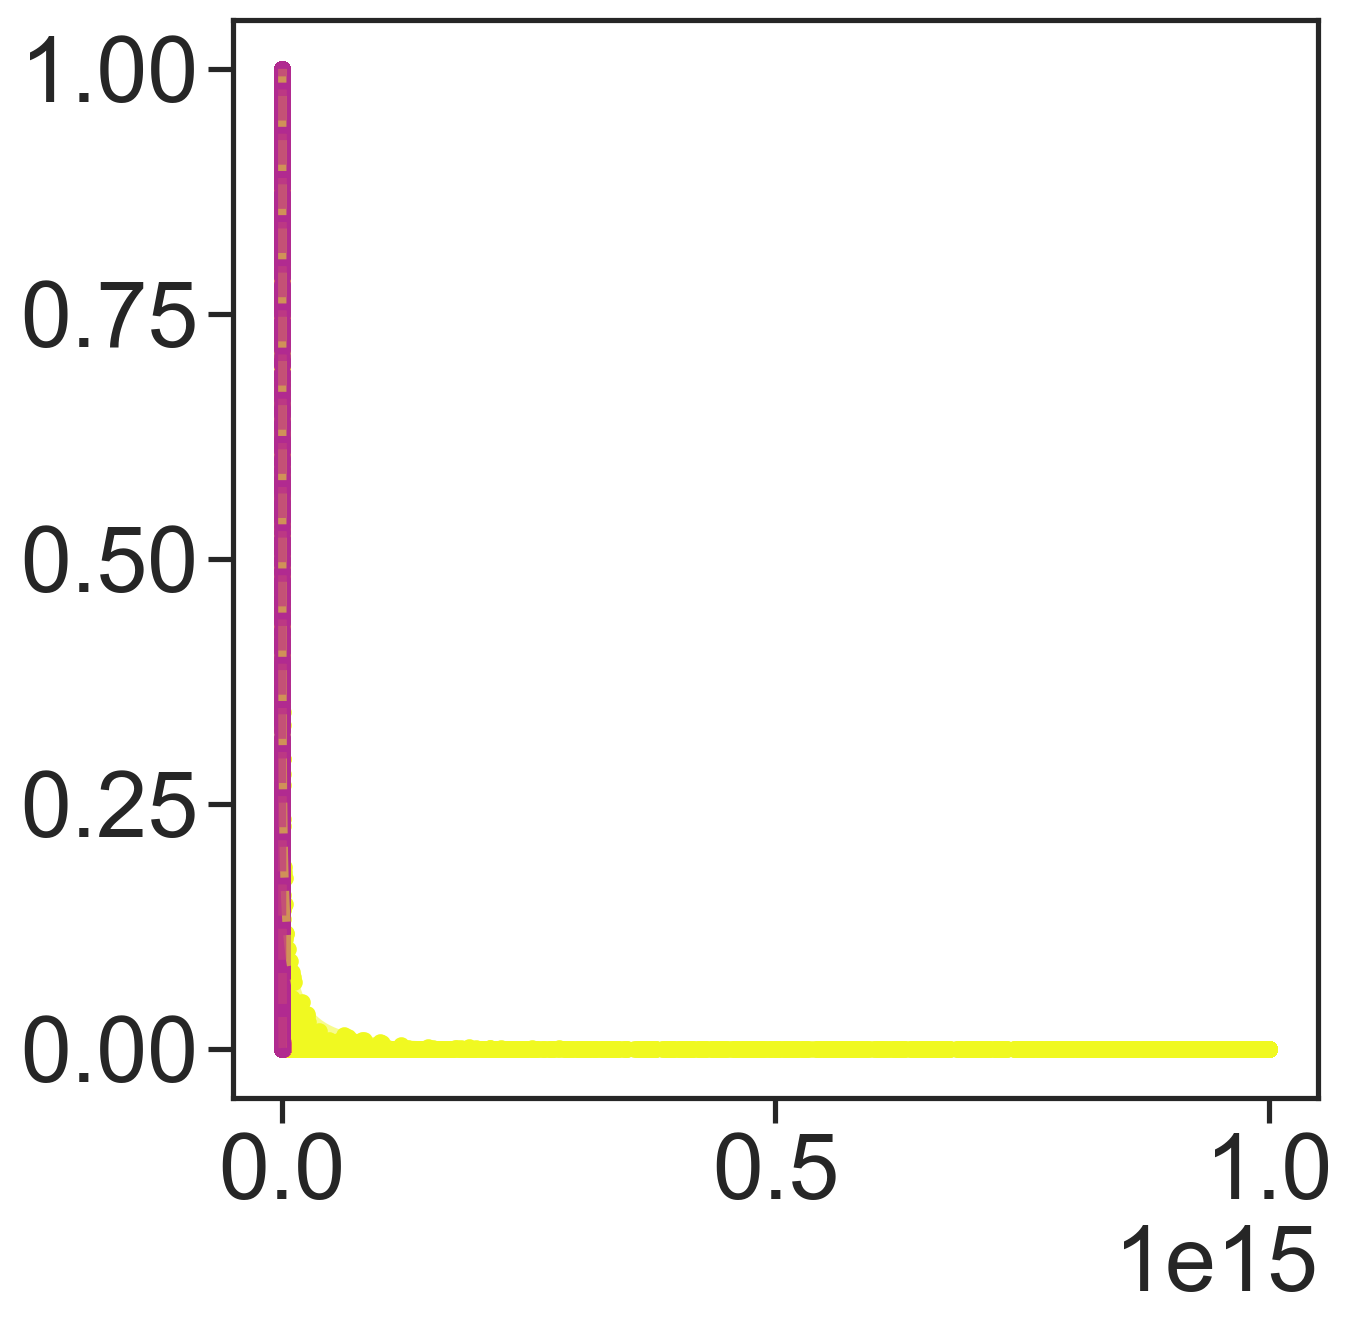

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn context for consistent styling
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

# Define colors and numbers (replace with your actual numbers list)
colors = [ '#f0f921', '#e16462','#b12a90','#6a00a8']
numbers = [4, 3, 2, 1]  # Example; replace with your numbers list

# Create a single figure and axes
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Loop through numbers to plot each dataset
for idx, i in enumerate(numbers):
    # Compute result for current n (assumes tradeoff_result_n is defined)
    result_n_i = tradeoff_result_n(kvec, koff_r2w, i)
    
    # Scatter plot for current n, using color from palette
    ax.scatter(result_n_i[:,1], result_n_i[:,0], s=20, color=colors[idx % len(colors)])
    #xx=np.logspace(-20,0,1000)
    #ax.plot(xx,1-xx,lw=3,color='r',label='$\eta+c=1$')
    ax.plot((1/xx**(1/(i+1))-1)**(i+1)*xx*(1000**(i+1)),xx,lw=3, color=colors[idx % len(colors)],linestyle = '--', label=f'n = {i}', alpha = 0.5)
    
# Set axis labels
ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')

# Set logarithmic scales and limits
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 1e13])
ax.set_ylim([1e-10, 2])  # Assumed same as x for consistency; adjust if needed

# Add legend
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

# Show plot
plt.show()

# Optional: Save the figure (uncomment to use)
#plt.savefig('figureS5A t_d_combined_scatter_n.svg', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('combined_scatter_n.png', dpi=300, bbox_inches='tight', transparent=True)

# Close figure to free memory
plt.close(fig)

# Optional: Colab download commands (uncomment if running in Colab)
# from google.colab import files
# files.download('combined_scatter_n.png')

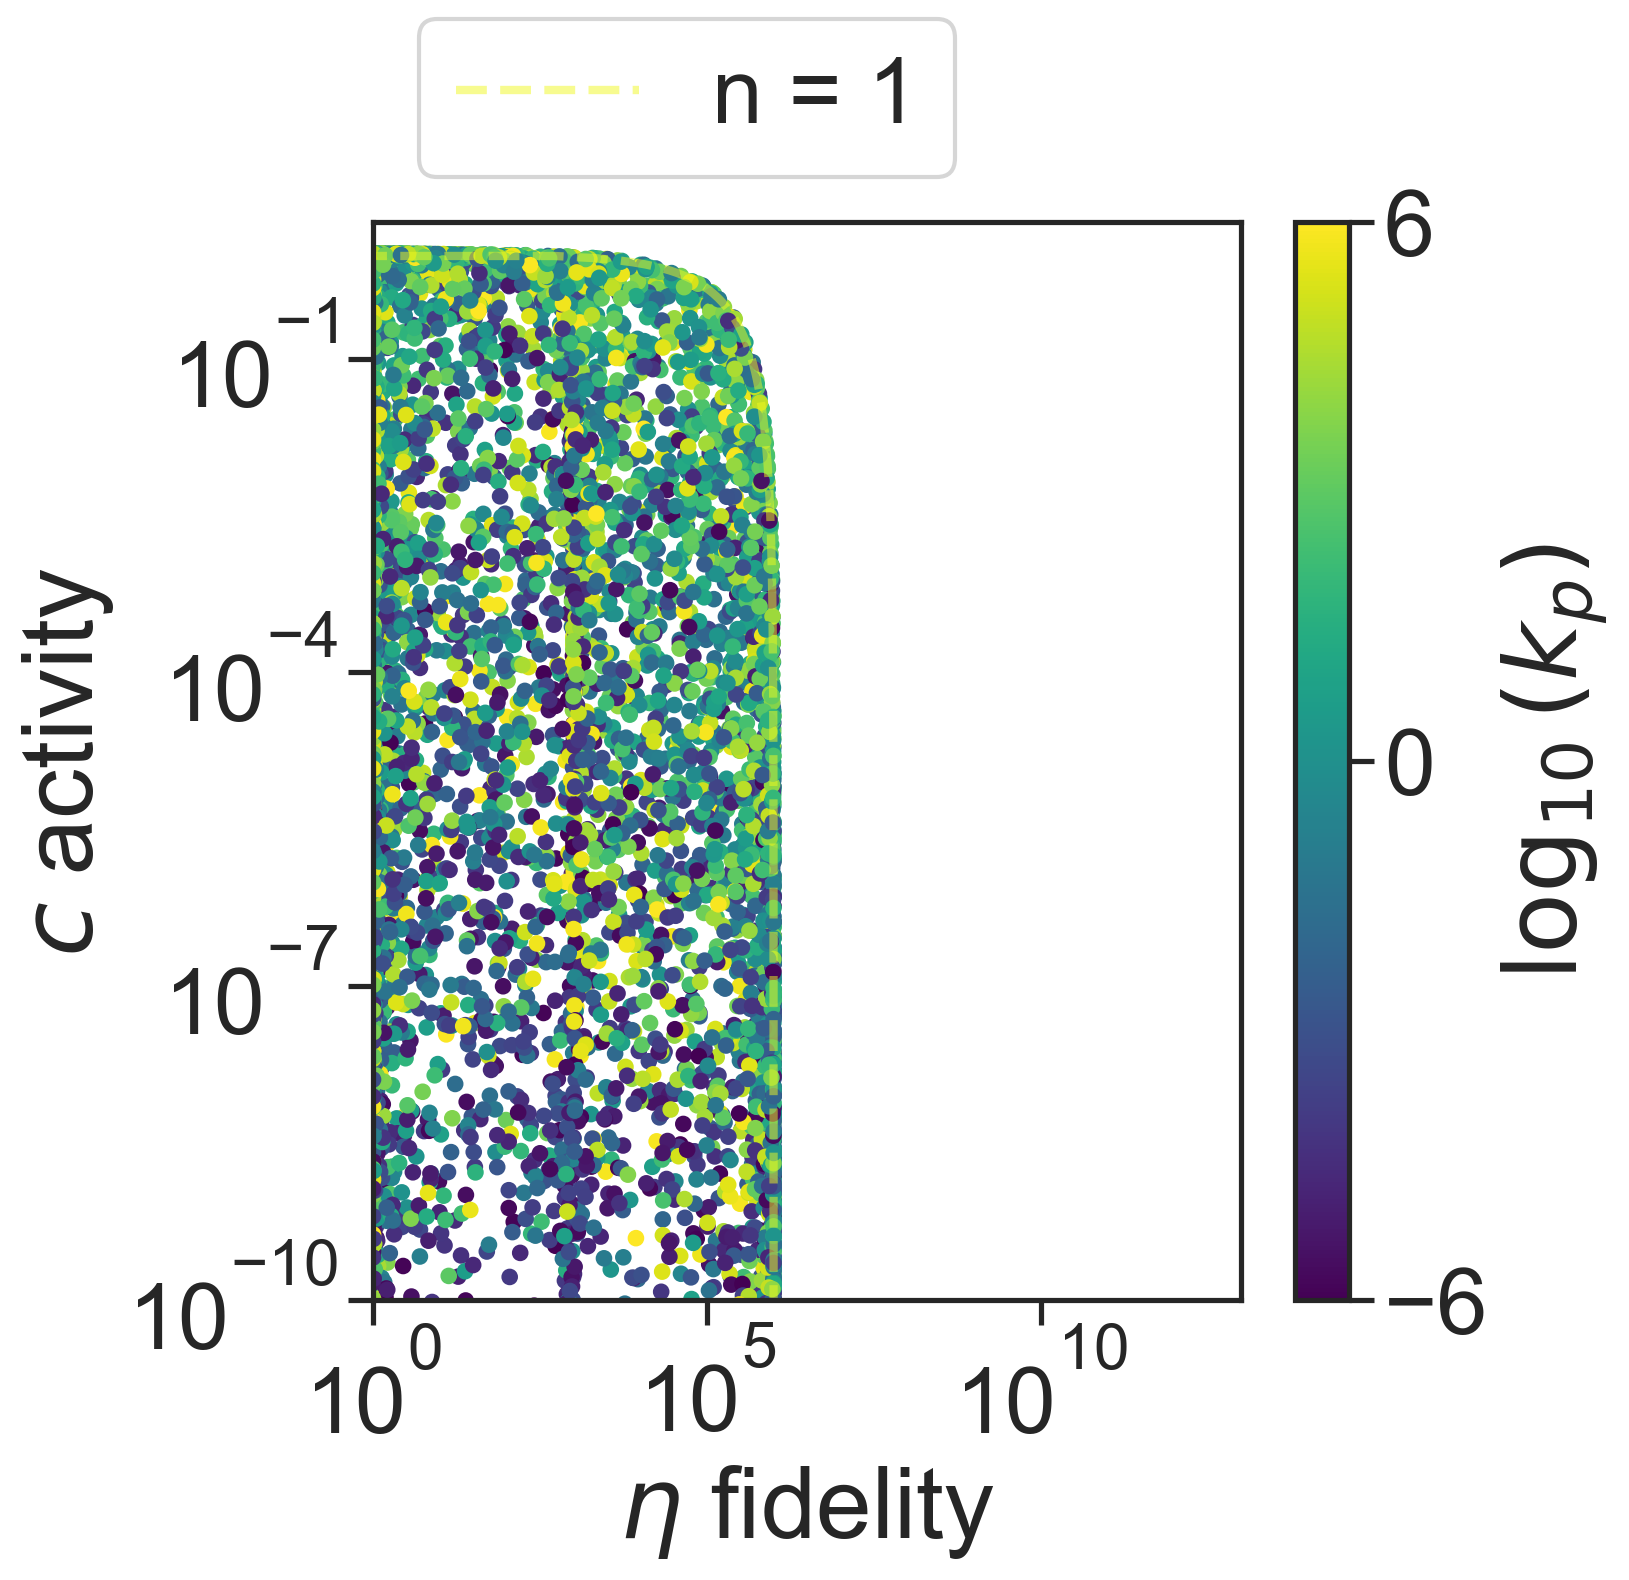

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set Seaborn context for consistent styling
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

# Define colors for the dashed lines (unchanged)
colors = ['#f0f921', '#e16462', '#b12a90', '#6a00a8']
numbers = [1]  # Example; replace with your numbers list

# Create a single figure and axes
fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Define colormap for kp values
cmap = plt.cm.viridis  # You can use other colormaps like plt.cm.plasma
norm = plt.Normalize(np.log10(kk[:,2]).min(), np.log10(kk[:,2]).max())  # Log scale normalization for kp

# Loop through numbers to plot each dataset
for idx, i in enumerate(numbers):
    # Compute result for current n (assumes tradeoff_result_n is defined)
    result_n_i = tradeoff_result_n(kk, koff_r2w, i)
    
    # Scatter plot with colors varying by kp (kk[:,2])
    scatter = ax.scatter(result_n_i[:,1], result_n_i[:,0], s=20, c=np.log10(result_n_i[:,7]), cmap=cmap, norm=norm)
    
    # Plot the dashed line with fixed color (unchanged)
    xx = np.logspace(-20, 0, 1000)
    ax.plot((1/xx**(1/(i+1))-1)**(i+1)*xx*(1000**(i+1)), xx, lw=3, color=colors[idx % len(colors)], 
            linestyle='--', label=f'n = {i}', alpha=0.5)

# Set axis labels
ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')

# Set logarithmic scales and limits
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 1e13])
ax.set_ylim([1e-10, 2])

# Add legend
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

# Add colorbar for kp values
cbar = fig.colorbar(scatter, ax=ax, label=r'$\log_{10}(k_p)$')
cbar.set_ticks([min_log10, 0, max_log10])  # Adjust ticks to match kp range

# Show plot
plt.show()

# Optional: Save the figure (uncomment to use)
# plt.savefig('figureS5A_t_d_combined_scatter_n.svg', dpi=300, bbox_inches='tight', transparent=True)
# plt.savefig('combined_scatter_n.png', dpi=300, bbox_inches='tight', transparent=True)

# Close figure to free memory
plt.close(fig)

# Optional: Colab download commands (uncomment if running in Colab)
# from google.colab import files
# files.download('combined_scatter_n.png')

NameError: name 'kp_values' is not defined

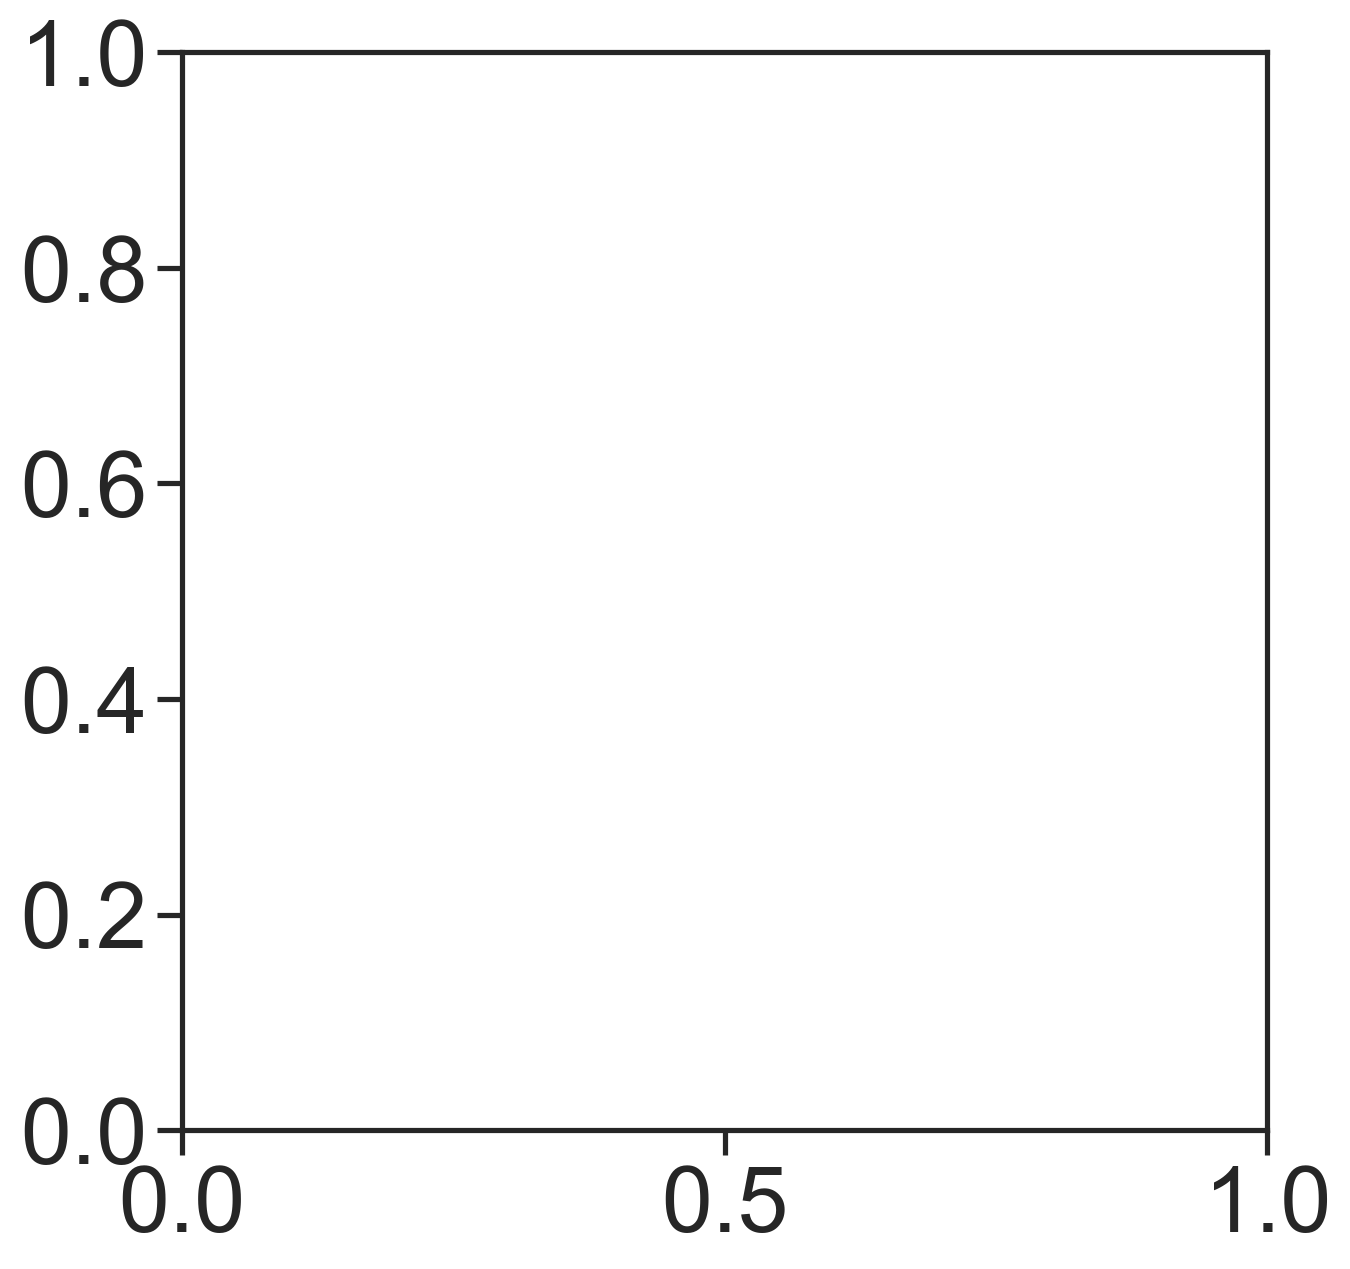

In [ ]:
# Plotting
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})
colors = ['#f0f921', '#e16462', '#b12a90', '#6a00a8', '#0d0887']  # Extended to match kp_values
numbers = [4, 3, 2, 1]

fig, ax = plt.subplots(1, 1, figsize=(7, 7))

# Map kp values to colors
kp_to_color = {kp: colors[i % len(colors)] for i, kp in enumerate(kp_values)}

for idx, i in enumerate(numbers):
    # Compute result for current n
    result_n_i = tradeoff_result_n(kk, koff_r2w, i)
    
    # Scatter plot with colors based on kp
    for kp in kp_values:
        mask = np.isclose(result_n_i[:, 7], kp)  # kp is in 8th column (index 7)
        if np.any(mask):
            ax.scatter(result_n_i[mask, 1], result_n_i[mask, 0], s=20, color=kp_to_color[kp],
                       label=f'n={i}, kp={kp}' if idx == 0 else None)  # Label only for first n
    
    # Theoretical curve
    xx = np.logspace(-20, 0, 1000)
    ax.plot((1 / xx ** (1 / (i + 1)) - 1) ** (i + 1) * xx * (1000 ** (i + 1)), xx,
            lw=3, color=colors[idx % len(colors)], linestyle='--', label=f'n={i}', alpha=0.5)

ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 1e13])
ax.set_ylim([1e-10, 2])
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

plt.show()
plt.close(fig)

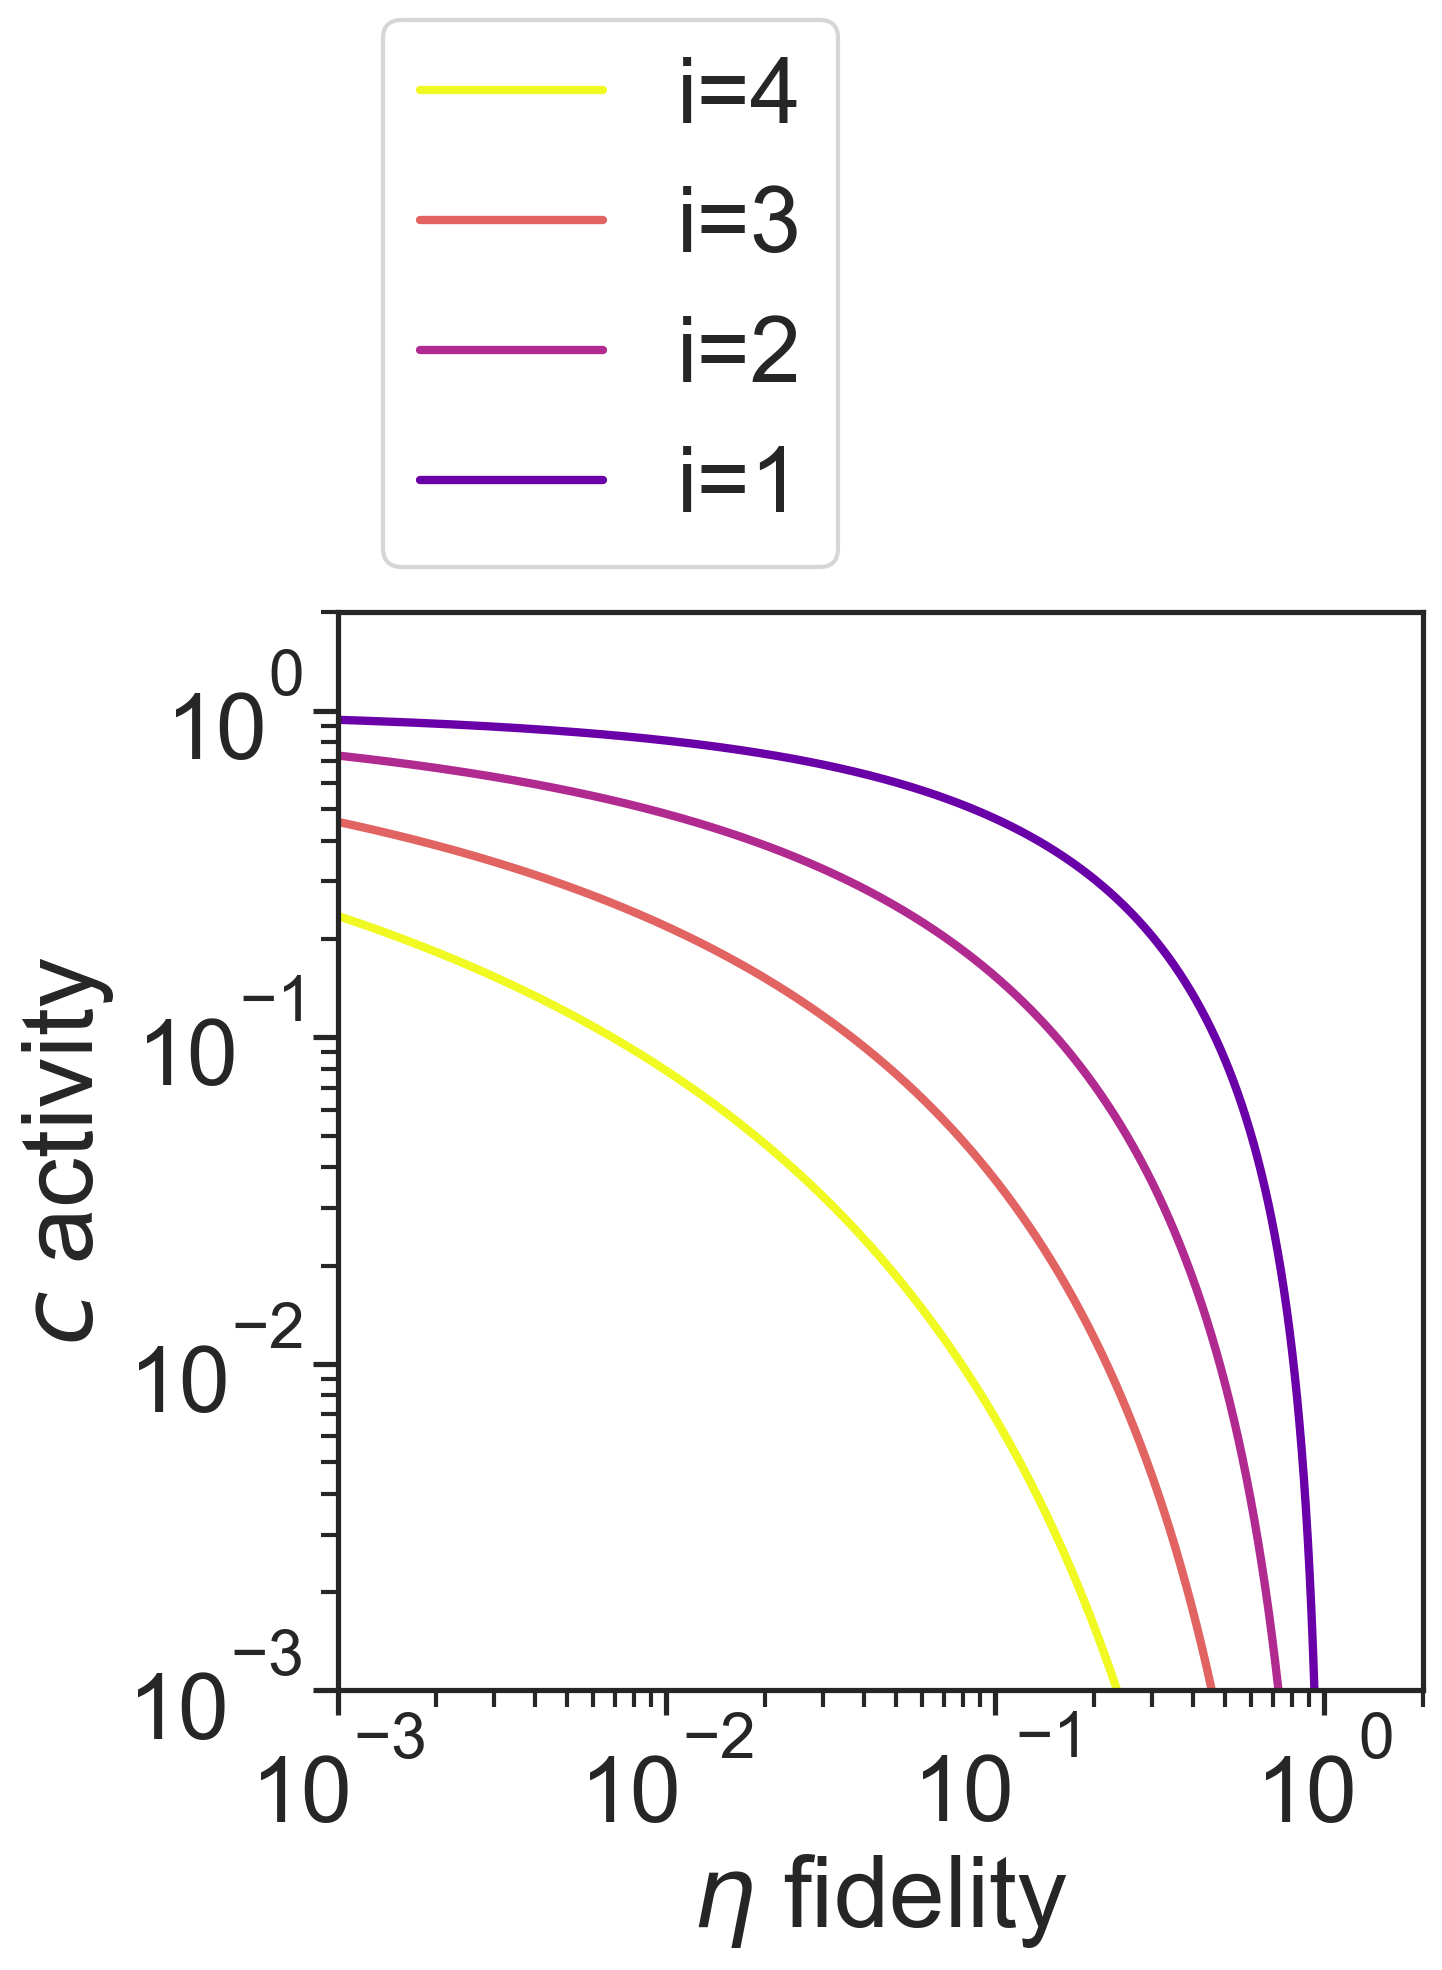

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})


#colors = ['#1f77b4', '#66a3cc', '#b3cce6', '#ffae4d', '#ff7f0e']
#colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
#colors = ['#00ffff', '#66cccc', '#9999ff', '#cc66cc', '#ff00ff']

for idx, i in enumerate(numbers):
    xx = np.logspace(-3, 0, 1000)
    ax.plot((1 / xx**(1 / (i + 1)) - 1)**(i + 1) * xx, xx,  lw=3, color=colors[idx % len(colors)], 
            label=r'i={}'.format(i))

ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')
ax.set_xlim([1e-3, 1 * 2])
ax.set_ylim([1e-3, 1 * 2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
plt.savefig(f'figure_5b.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

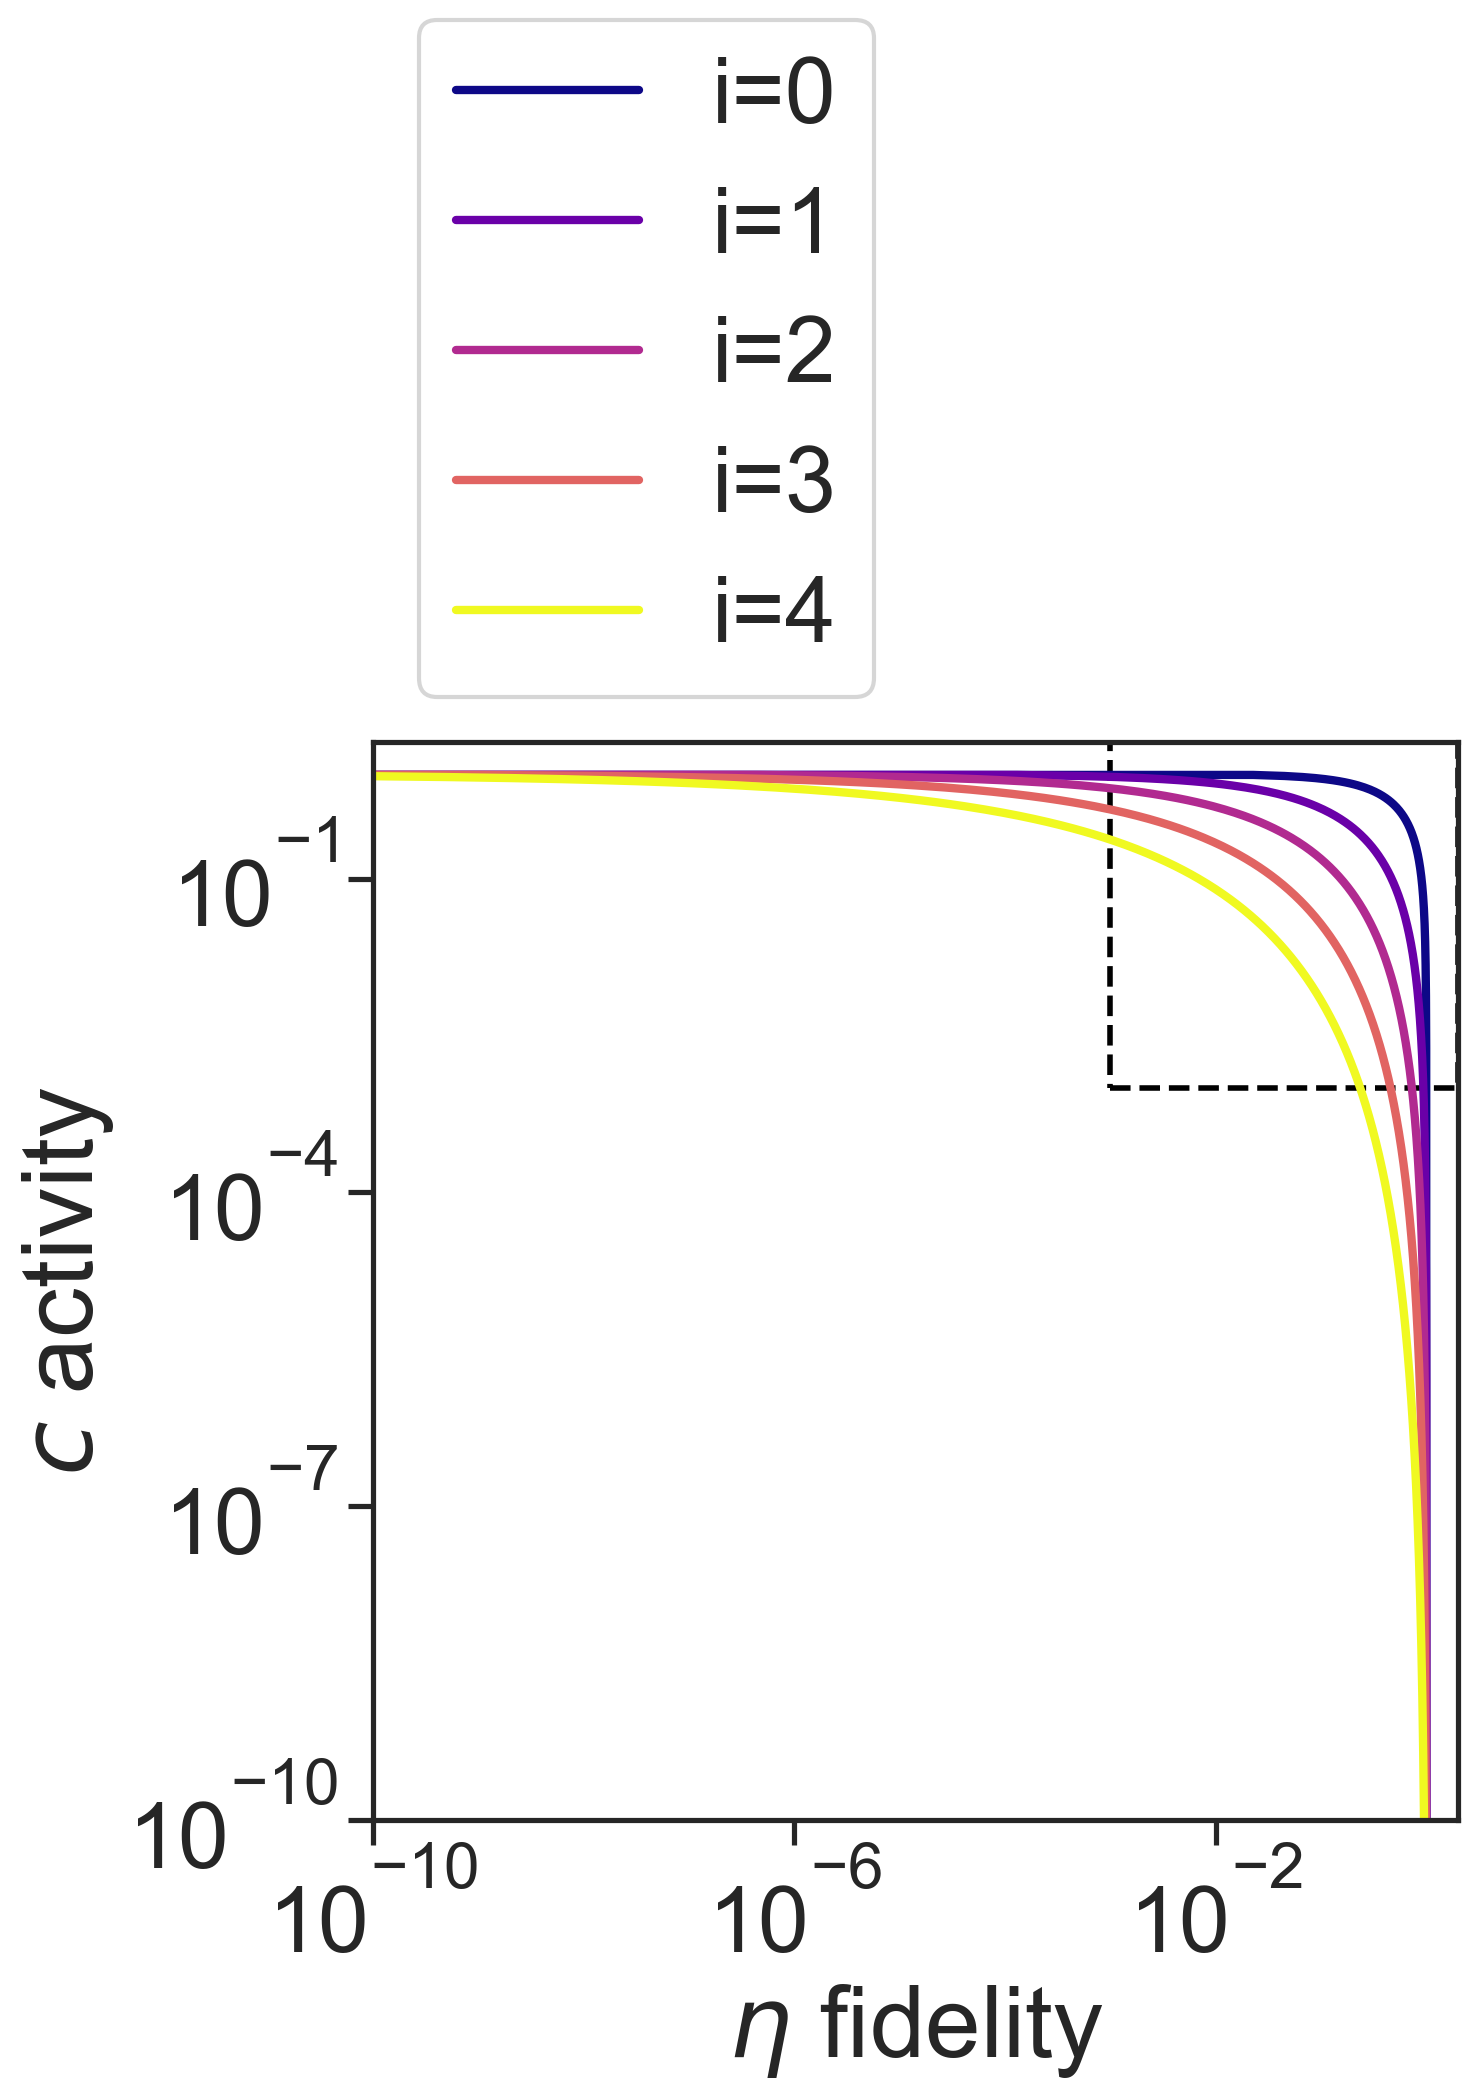

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

numbers = [0, 1, 2, 3, 4]  # Replace with your actual numbers
colors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921'] 

# Plot the curves
for idx, i in enumerate(numbers):
    xx = np.logspace(-10, 0, 1000)
    ax.plot((1 / xx**(1 / (i + 1)) - 1)**(i + 1) * xx, xx, lw=3, color=colors[idx % len(colors)], 
            label=r'i={}'.format(i))

# Add a rectangular dashed box
rect = plt.Rectangle( (1e-3, 1e-3),2 - 1e-3, 2 - 1e-3, 
                    fill=False, linestyle='--', linewidth=2, edgecolor='black')
ax.add_patch(rect)

# Set labels and scales
ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')

ax.set_xlim([1e-10, 1 * 2])
ax.set_ylim([1e-10, 1 * 2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

# Save and show the figure
plt.savefig(f'figure_5b(1).svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

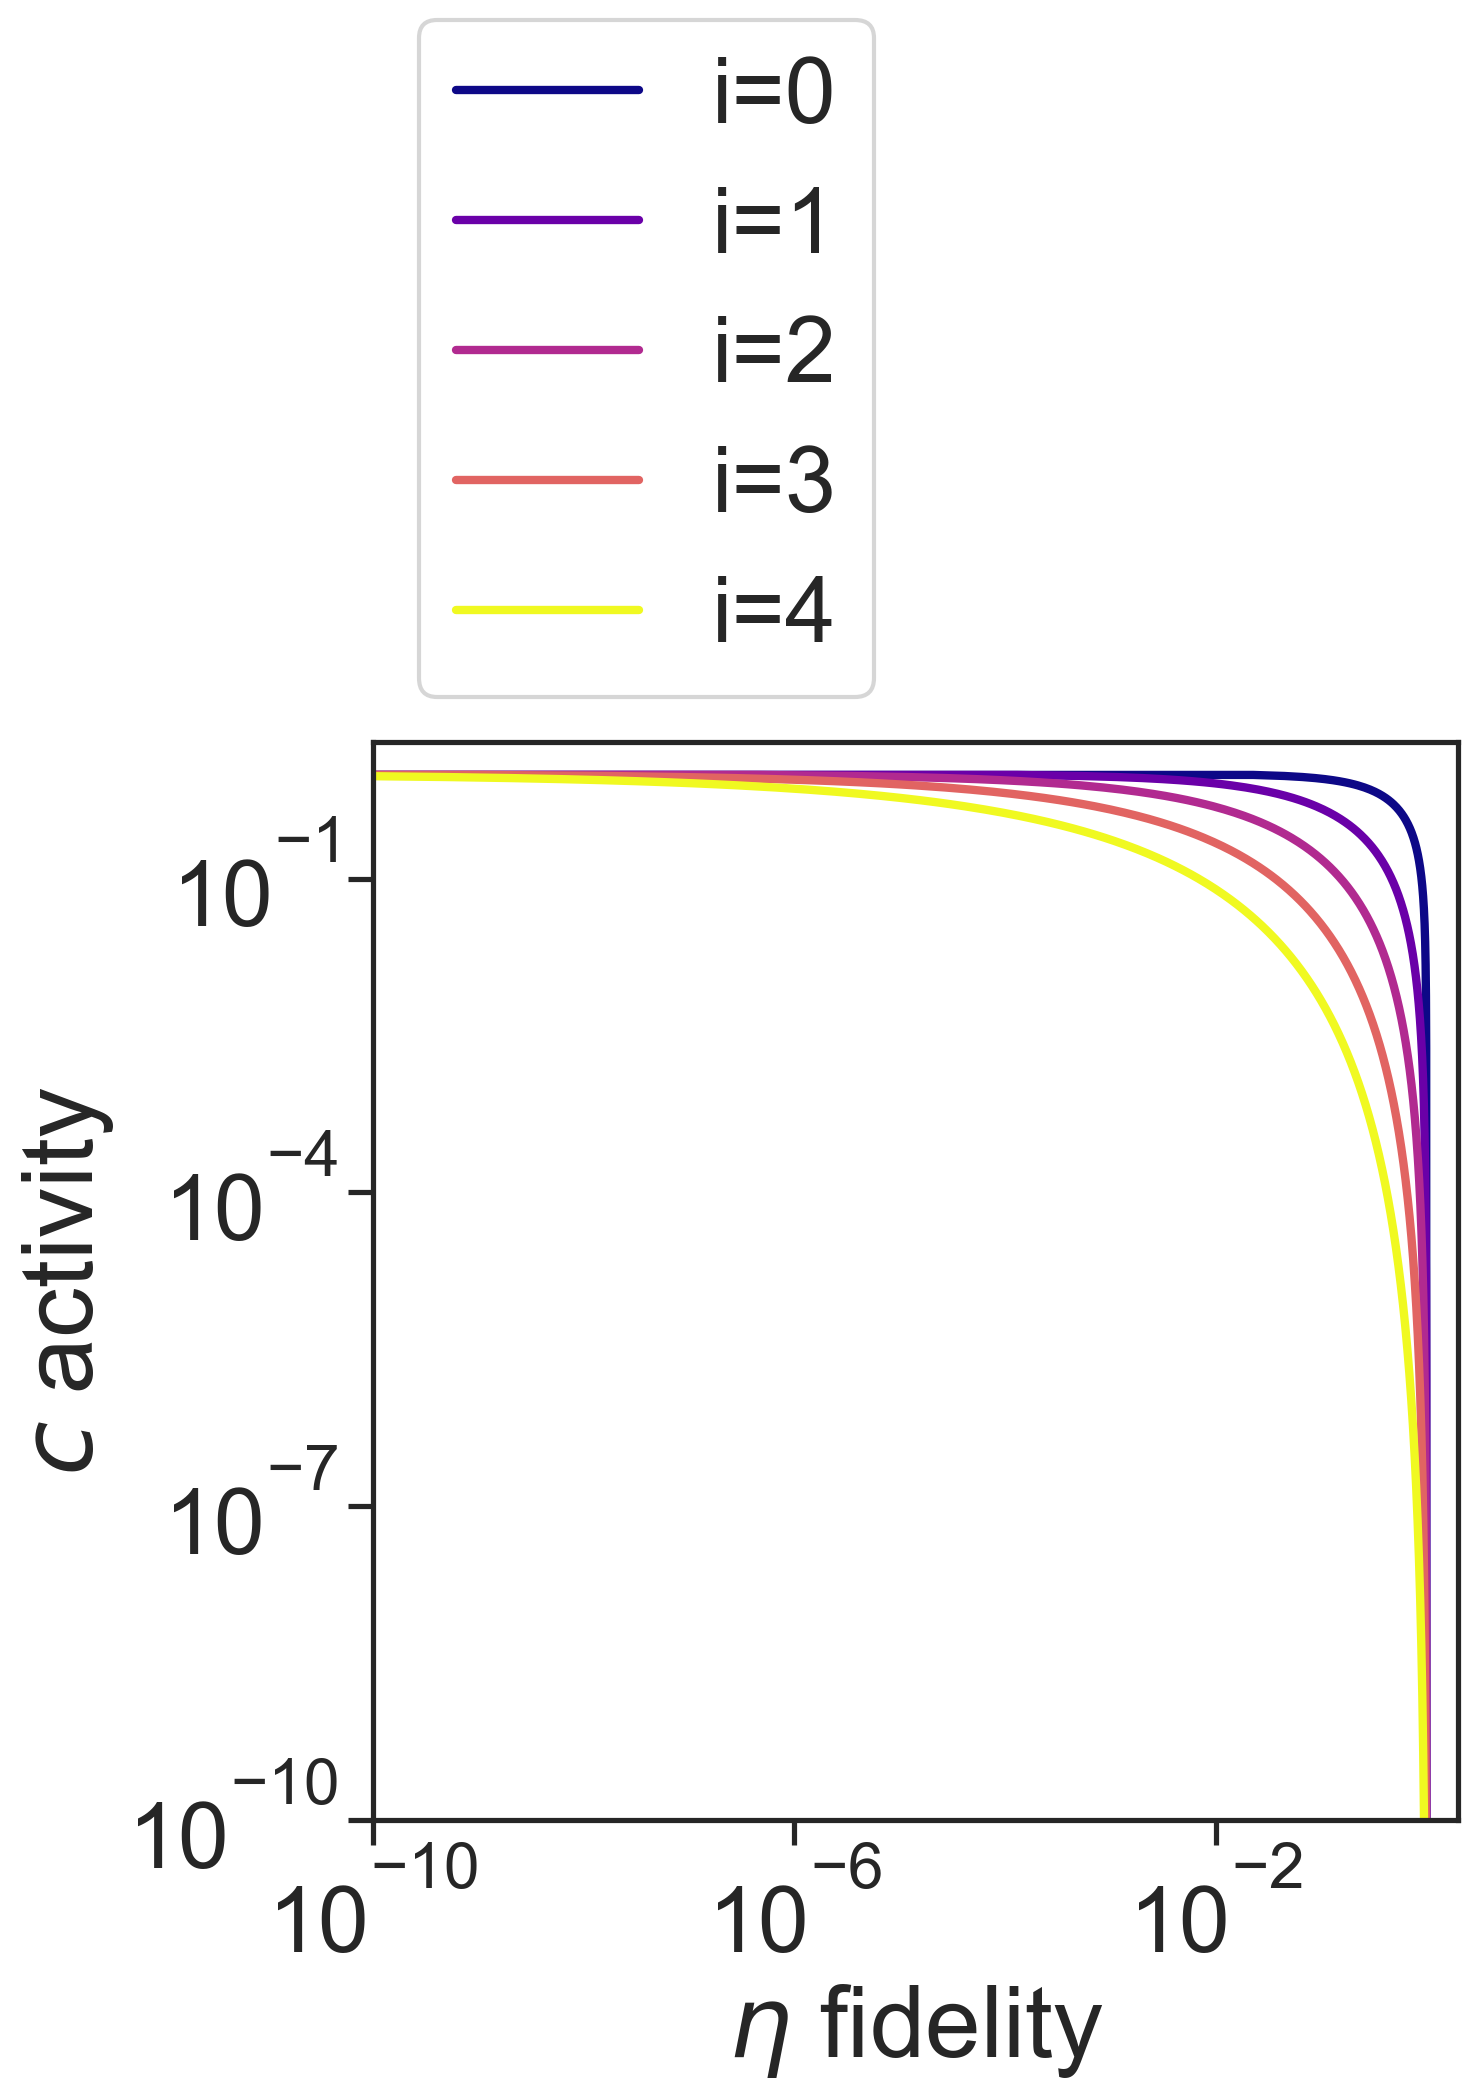

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

numbers = [0, 1, 2, 3, 4]  # Replace with your actual numbers
colors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921'] 
#colors = ['#1f77b4', '#66a3cc', '#b3cce6', '#ffae4d', '#ff7f0e']
#colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
#colors = ['#00ffff', '#66cccc', '#9999ff', '#cc66cc', '#ff00ff']

for idx, i in enumerate(numbers):
    xx = np.logspace(-10, 0, 1000)
    ax.plot((1 / xx**(1 / (i + 1)) - 1)**(i + 1) * xx, xx,  lw=3, color=colors[idx % len(colors)], 
            label=r'i={}'.format(i))

ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')
ax.set_xlim([1e-10, 1 * 2])
ax.set_ylim([1e-10, 1 * 2])

ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
#plt.savefig(f'figure_5b(1).svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

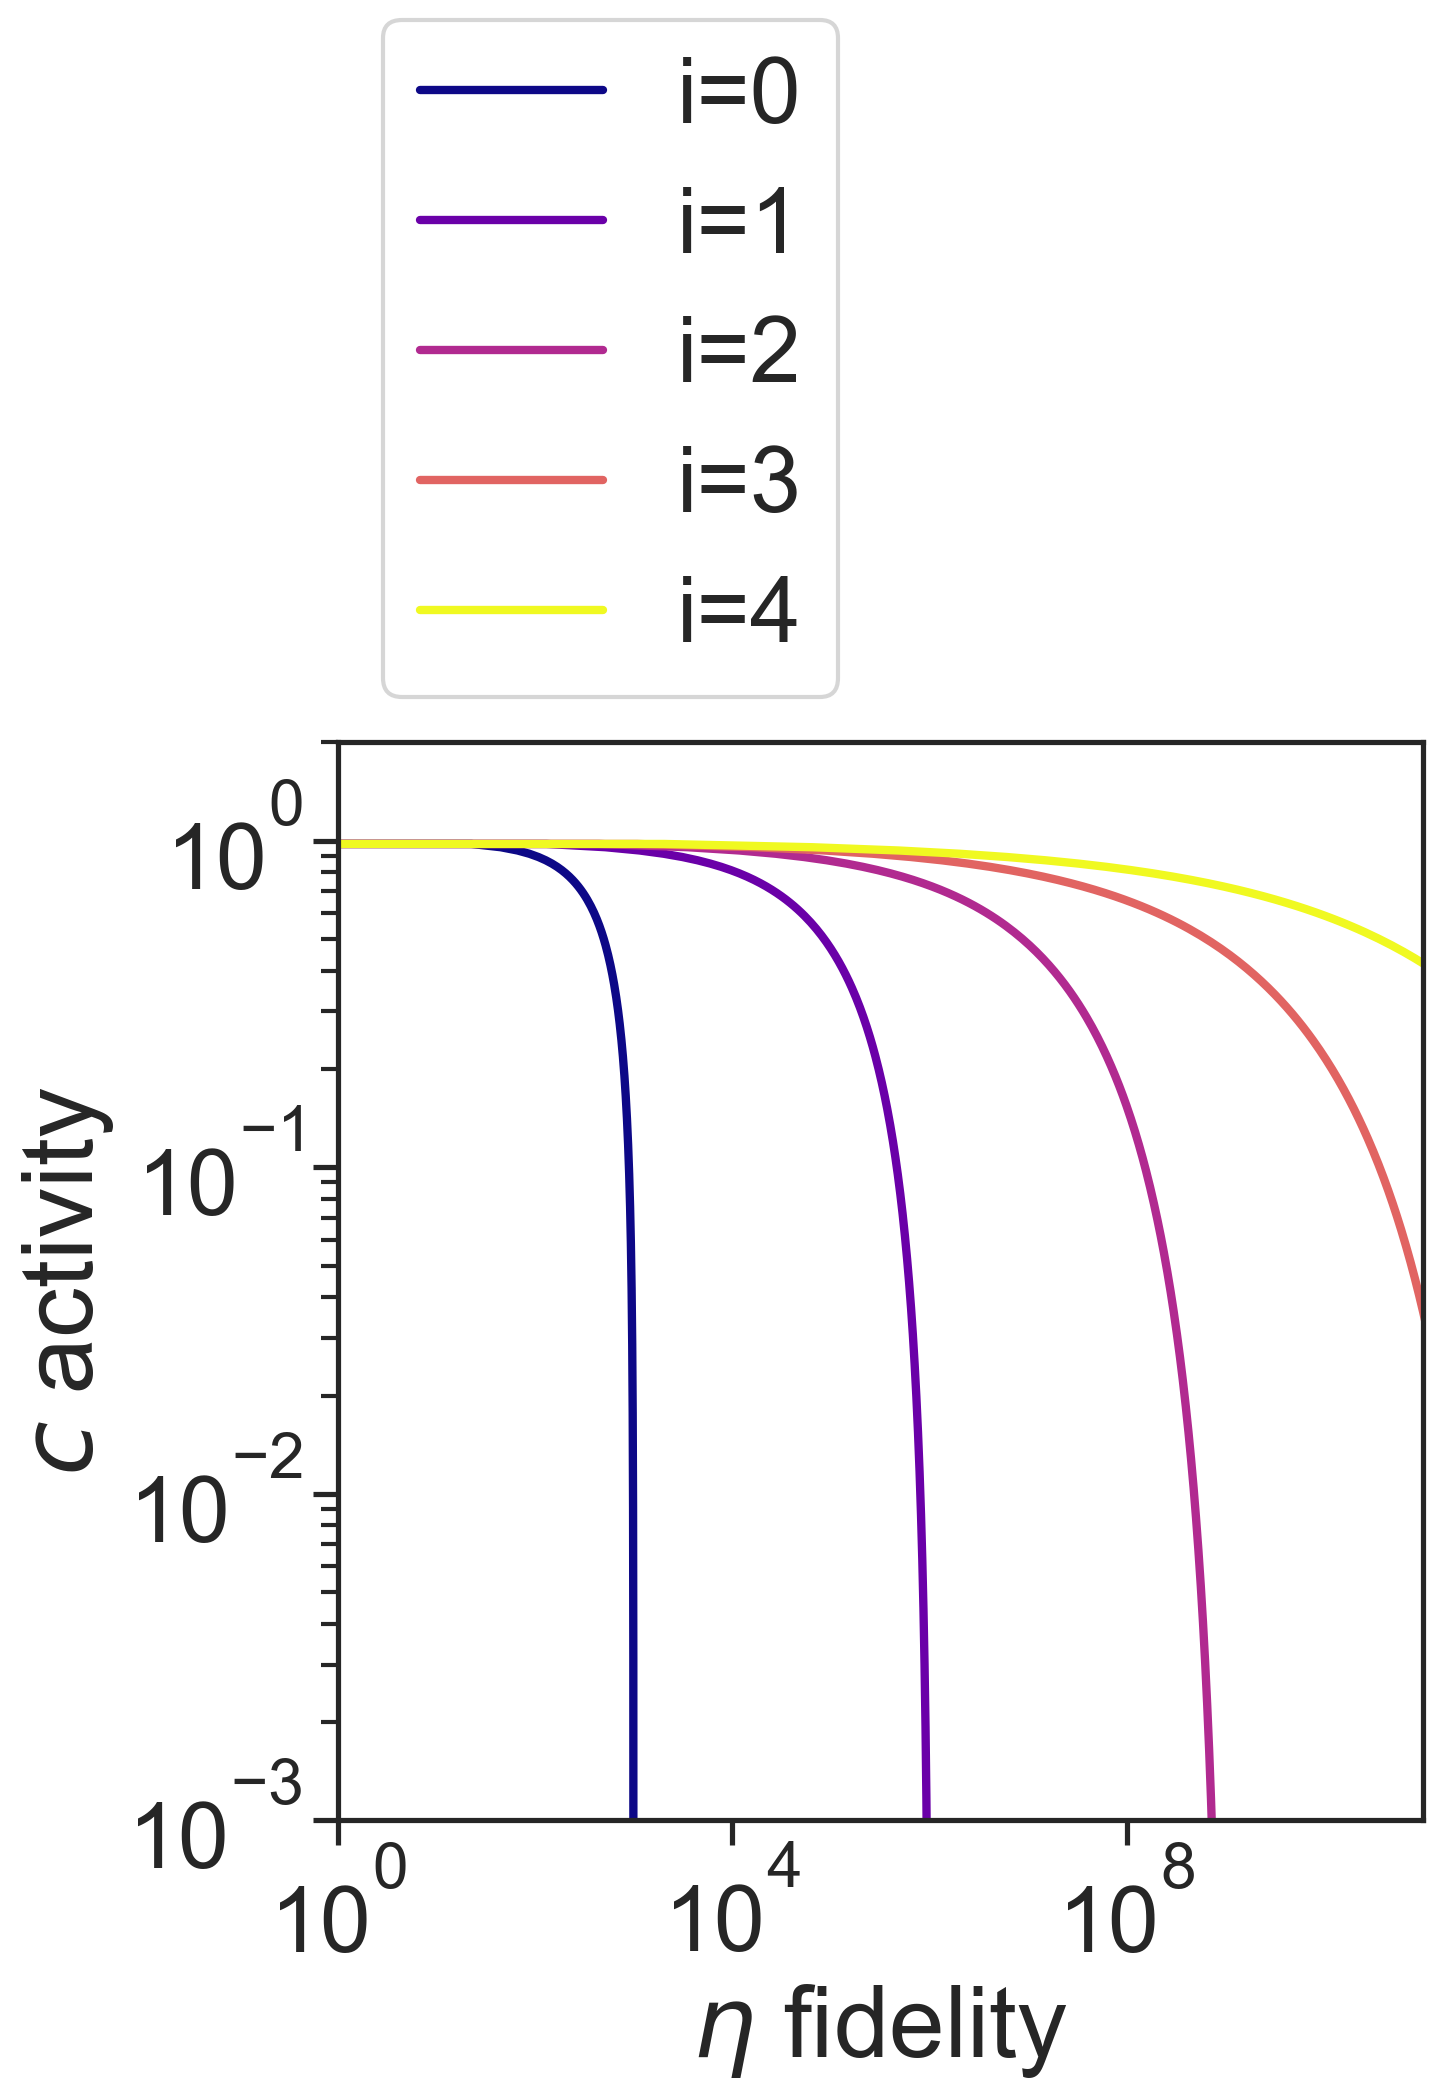

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

numbers = [0, 1, 2, 3, 4]  # Replace with your actual numbers
colors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921'] 
#colors = ['#1f77b4', '#66a3cc', '#b3cce6', '#ffae4d', '#ff7f0e']
#colors = ['#d7191c', '#fdae61', '#ffffbf', '#abd9e9', '#2c7bb6']
#colors = ['#00ffff', '#66cccc', '#9999ff', '#cc66cc', '#ff00ff']
  
for idx, i in enumerate(numbers):
    xx = np.logspace(-10, 0, 1000)
    ax.plot(((1 / xx**(1 / (i + 1)) - 1)**(i + 1) * xx)* 1000**(i+1) , xx, lw=3, color=colors[idx % len(colors)], 
            label=r'i={}'.format(i))

ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')
ax.set_ylim([1e-3, 1 * 2])
ax.set_xlim([1e0, 1e11])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')
plt.savefig(f'figure_5c.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()

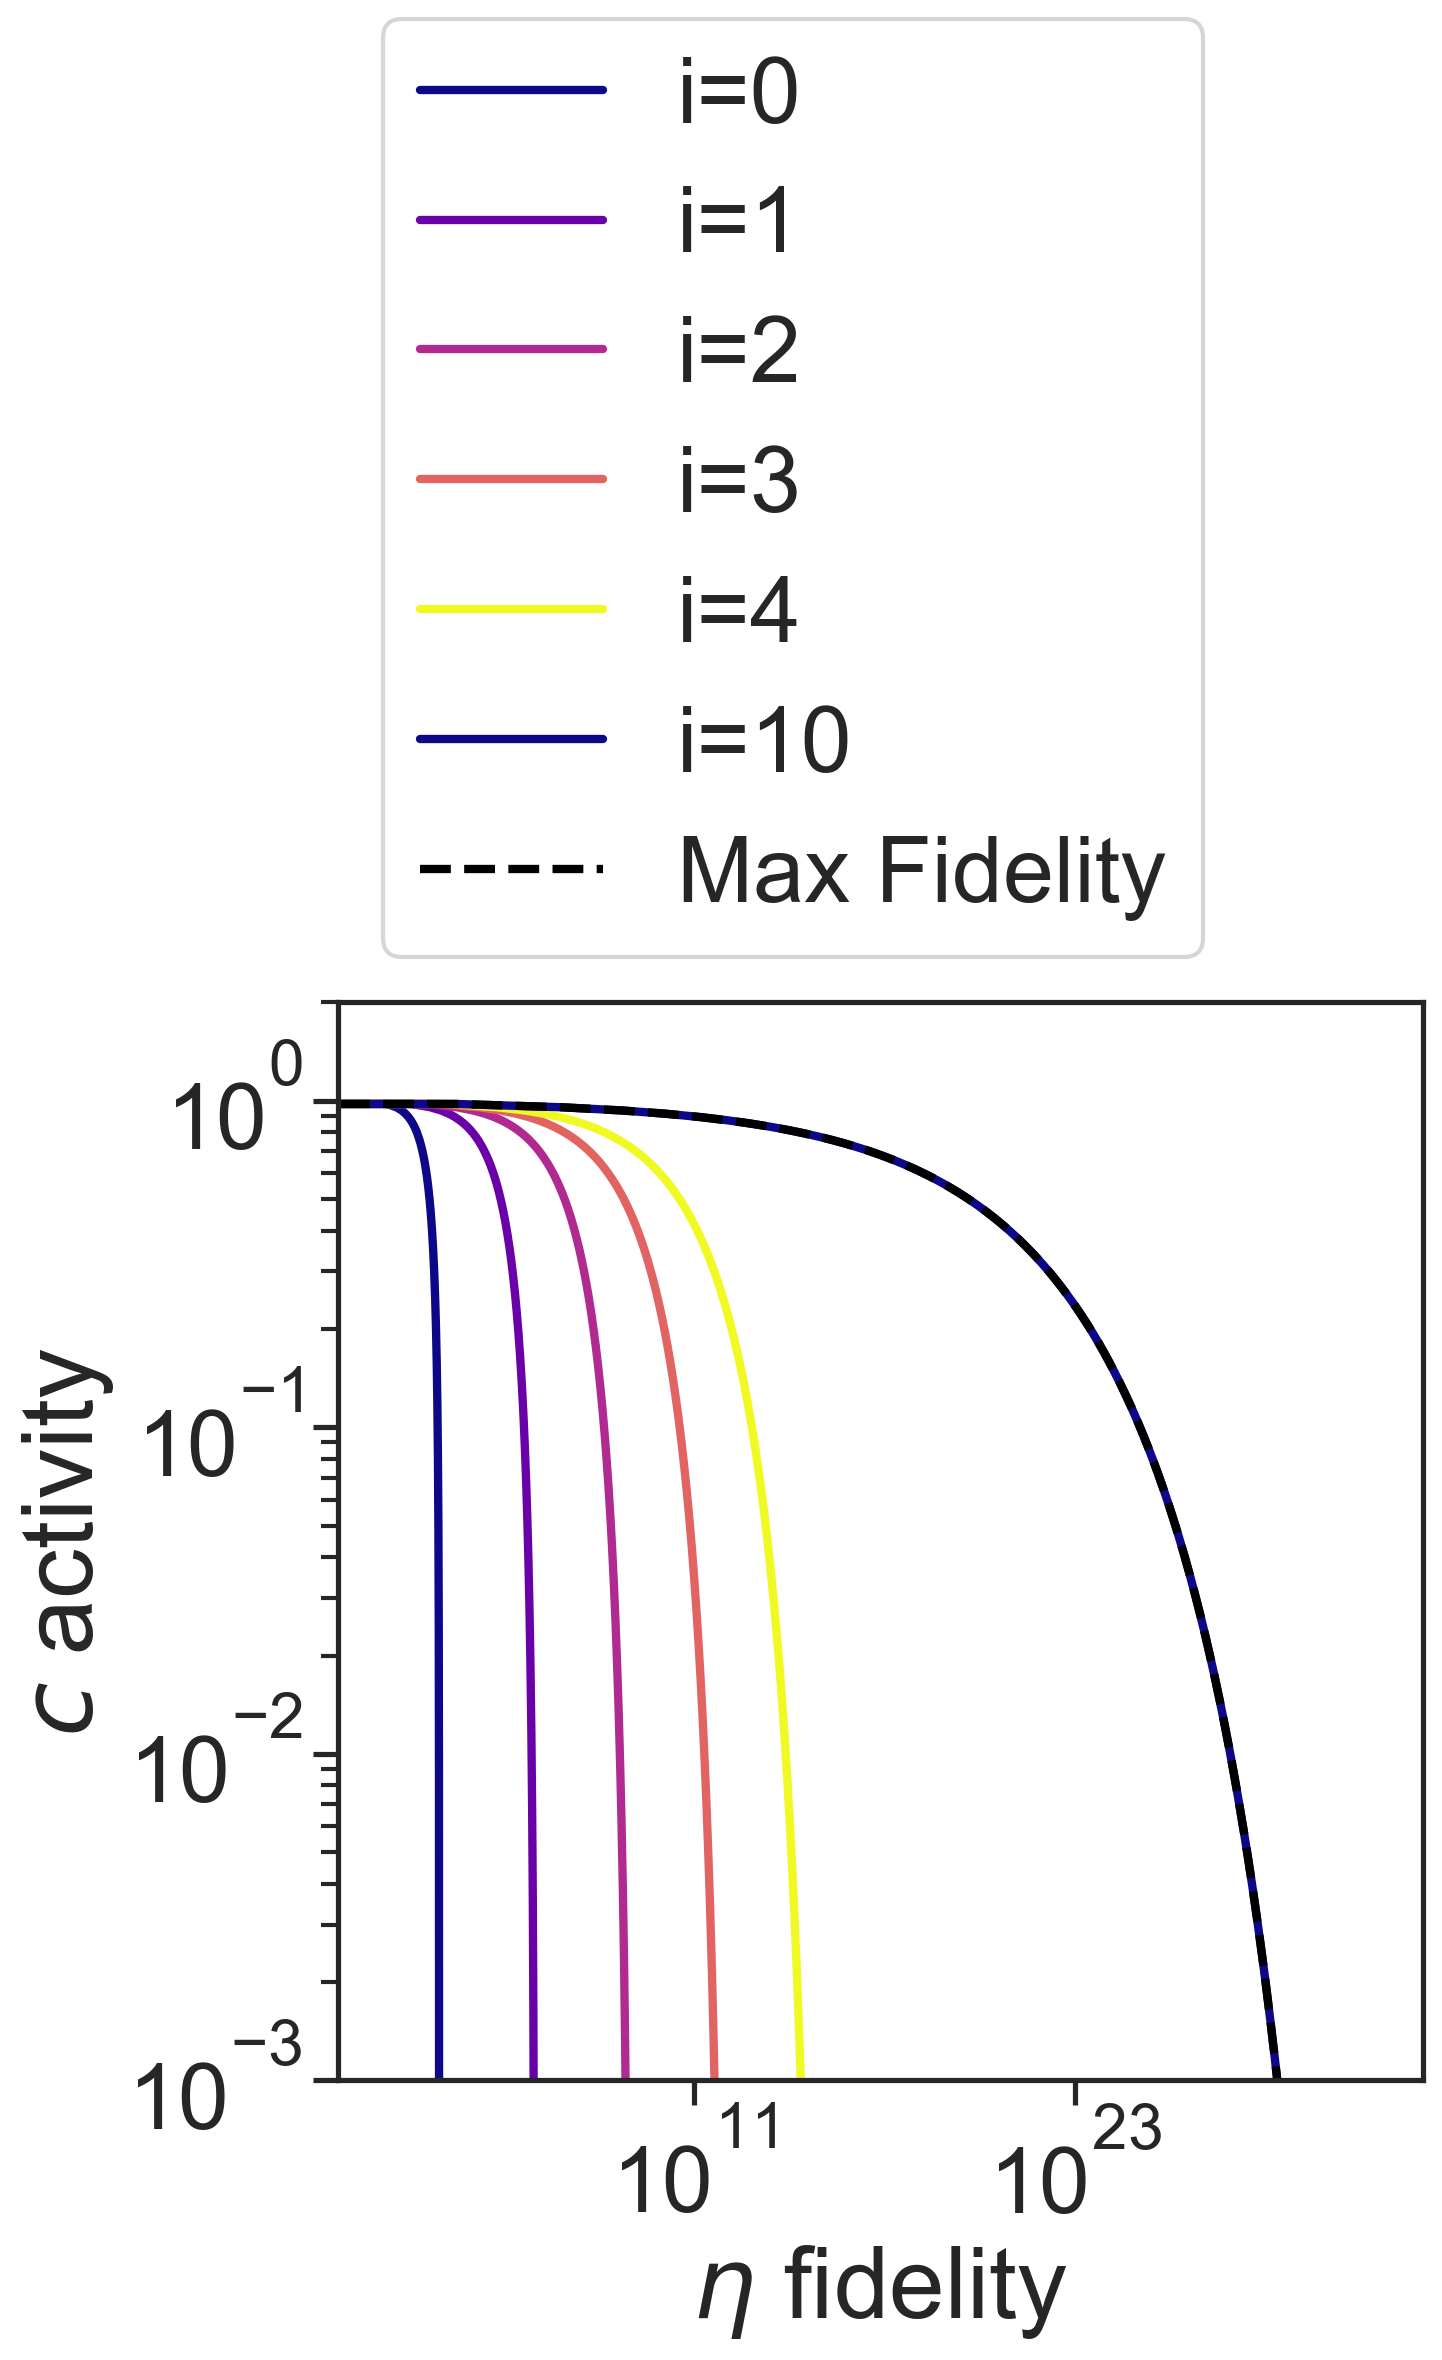

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.set_context('talk', font_scale=2, rc={'lines.linewidth': 3})

# Define numbers and colors
numbers = [0, 1, 2, 3, 4,10]
colors = ['#0d0887', '#6a00a8', '#b12a90', '#e16462', '#f0f921']

# Generate x-values (c activity)
xx = np.logspace(-10, 0, 1000)

# Array to store η values for all i
eta_values = np.zeros((len(numbers), len(xx)))

# Plot individual curves and store η values
for idx, i in enumerate(numbers):
    eta = ((1 / xx**(1 / (i + 1)) - 1)**(i + 1) * xx) * 1000**(i + 1)
    ax.plot(eta, xx, lw=3, color=colors[idx % len(colors)], 
            label=r'i={}'.format(i))
    eta_values[idx] = eta

# Calculate the maximum η across all i for each c
max_eta = np.max(eta_values, axis=0)

# Plot the new curve (maximum fidelity for each activity)
ax.plot(max_eta, xx, lw=3, color='black', linestyle='--', 
        label='Max Fidelity')

# Set labels and scales
ax.set_ylabel(r'$c$ activity')
ax.set_xlabel(r'$\eta$ fidelity')
#ax.set_xlim
ax.set_ylim([1e-3, 1 * 2])
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(bbox_to_anchor=(0, 1), loc='lower left')

# Save and show the plot
plt.savefig('figure_5c_updated.svg', dpi=300, bbox_inches='tight', transparent=True)
plt.show()